In [1]:
import numpy as np
import pandas as pd

import keras
from keras import optimizers
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Activation, Dense,Dropout

from sklearn.preprocessing import MinMaxScaler


# class MyLSTM:
#     sc_in = MinMaxScaler(feature_range=(0, 1))
#     sc_out = MinMaxScaler(feature_range=(0, 1))

#     def __init__(self, args):
#         self.model = Sequential()
#         self.is_model_created = False
#         self.hidden_dim = args.hidden_dim
#         self.epochs = args.epochs


#     def create_model(self, shape_):
#         self.model.add(LSTM(self.hidden_dim, return_sequences=True, input_shape=(1, shape_)))
#         # model.add(LSTM(256, return_sequences=True,input_shape=(1, look_back)))
#         self.model.add(LSTM(self.hidden_dim))
#         self.model.add(Dense(1))
#         self.model.compile(loss='mean_squared_error', optimizer='adam')

#     def fit(self, data_x):
#         data_x = np.array(data_x)
#         train_x = data_x[:, 1:-1]
#         train_y = data_x[:, -1]

#         if self.is_model_created == False:
#             self.create_model(train_x.shape[1])
#             self.is_model_created = True

#         train_x = self.sc_in.fit_transform(train_x)
#         train_y = train_y.reshape(-1, 1)
#         train_y = self.sc_out.fit_transform(train_y)
#         train_x = np.array(train_x, dtype=float)
#         train_y = np.array(train_y, dtype=float)
#         train_x = np.reshape(train_x, (train_x.shape[0], 1, train_x.shape[1]))
#         self.model.fit(train_x, train_y, epochs=self.epochs, verbose=1, shuffle=False, batch_size=50)

#     def predict(self, test_x):
#         test_x = np.array(test_x.iloc[:, 1:], dtype=float)
#         test_x = self.sc_in.transform(test_x)
#         test_x = np.reshape(test_x, (test_x.shape[0], 1, test_x.shape[1]))
#         pred_y = self.model.predict(test_x)
#         pred_y = pred_y.reshape(-1, 1)
#         pred_y = self.sc_out.inverse_transform(pred_y)
#         return pred_y

In [2]:
import tensorflow as tf
print(tf.__version__)


2.13.0


In [3]:
data = pd.read_csv('final_merged_eth_gold_global_data_v1.csv', parse_dates=['Date'], index_col='Date')
data

,Close,Close_gold,Volume_gold,Unnamed: 0,Open,High,Low,Close_global,Adj Close,Volume,...,GC=F,^BSESN,^DJI,^FTSE,^GSPC,^IXIC,^N100,^N225,^NSEI,^NYA
Date,,,,,,,,,,,,,,,,,,,,,
2020-01-01,98.714050,1528.1,270.55,0,97.754478,100.102066,97.467186,98.714050,98.714050,5988583431,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12182.500000,NaN
2020-01-02,96.912010,1528.1,270.55,1,98.727661,98.727661,96.602150,96.912010,96.912010,6109919641,...,1524.500000,41626.640625,28868.800781,7604.299805,3257.850098,9092.190430,1158.260010,NaN,12282.200195,14002.490234
2020-01-03,102.573875,1552.4,436.74,2,96.912827,102.866142,96.284966,102.573875,102.573875,8009516846,...,1549.199951,41464.609375,28634.880859,7622.399902,3234.850098,9020.769531,1157.380005,NaN,12226.650391,13917.049805
2020-01-04,103.260132,1552.4,436.74,3,102.571434,104.011894,101.709099,103.260132,103.260132,5680904209,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-05,104.199127,1552.4,436.74,4,103.262215,106.521660,103.241982,104.199127,104.199127,5755001349,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-06-02,1486.630859,1969.6,209.69,1248,1505.731689,1516.705200,1484.422241,1486.630859,1486.630859,4502540872,...,1952.400024,62547.109375,33762.761719,7607.299805,4282.370117,13240.769531,1351.290039,31524.220703,18534.099609,15345.190430
2023-06-03,1531.687256,1969.6,209.69,1249,1486.808228,1533.875244,1478.660522,1531.687256,1531.687256,4897002266,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-06-04,1519.949829,1969.6,209.69,1250,1531.819092,1533.066772,1514.386108,1519.949829,1519.949829,2788864991,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Load the dataset, and define several data creation functions.
Data investment:

scale_data: This function is used to scale the entire dataset (assumed to be a 2D numpy warehouse), and the layout is positioned
0
,
1
0,1 interval.
scale_single_data: This function is used to scale a data series separately, set in
0
,
1
0,1 interval.
create_sequences_single_coin: This function is used to create input and output sequences. For example, it will take the previous 60 days of data as input and the next day's data as output.
Data split:

Using the above function, first split the data and then divide it into training set, validation set and test set.
Model building:

build_lstm: This function is used to build the LSTM model. The model structure is as follows:
The first LSTM layer has 128 neurons and returns sequences.
The second LSTM layer has 64 neurons and does not return sequences.
A fully connected layer with 25 neurons.
The output layer, with 1 neuron, is used to predict the next data point.
Model training:

Training model training using Adam optimizer and mean squared loss. At the same time, train the model using data and validation data.
Model evaluation:

Use the trained LSTM model to make predictions on the test data.
Computes the RMSE (root mean square pallet), MAE (mean absolute pallet), DW statistic (Durbin-Watson statistic, used to detect autocorrelation of residuals) and MAPE (mean absolute pallet) of the resulting predictions.
Result visualization:

Using matplotlib is equivalent to a comparison plot of actual and predicted values.

In [4]:
import pandas as pd
import numpy as np

# Load the data again
data = pd.read_csv("final_merged_eth_gold_global_data_v1.csv")

# Function to scale data

# # 

# #Data loading:

# Load data from a CSV file into a DataFrame using pandas.
# Define the scaling function (scale_data):

# The purpose of this function is to normalize a set of data to
# 0
# ,
# 1
# in the range of 0,1. This is a common practice for many neural network models, especially LSTM, when processing data, because normalized data helps the model to converge better.

# Function input: Assumed to be a 2D numpy array, where each row is a different data sequence.

# Function output: shift and factor of each data series. These two values are used in subsequent denormalization to convert predicted values ​​or any other normalized values ​​back to their original scale.

# Inside the function:

# For each row of data (ie each data sequence):
# 0 values are ignored (assuming 0 is the padding value).
# Find the maximum and minimum of non-zero values.
# Shift down using min and scale using (max - min) to normalize this data series to
# 0
# ,
# 1
# 0,1.
# Perform scaling operations:

# Use the scale_data function to normalize the Close column.
# Here, the Close column is reshaped as a 2D array (1 row, multiple columns) because the scale_data function expects a 2D input.
# Store shift and factor for later use.
# Summary: The main purpose of this code is to normalize the data and save the necessary parameters so that the normalized data can be restored to its original scale later. This is a common preprocessing step in machine learning and deep learning.

def scale_data(data):
    coin_no, max_length = data.shape
    
    shift = np.zeros(coin_no)  # Initialize an array to store the shift values
    factor = np.zeros(coin_no)  # Initialize an array to store the scaling factors
    
    # Iterate through each coin (assuming each row is a coin's data)
    for i in range(coin_no):
        non_zero_data = data[i][data[i] != 0]  # Consider only non-zero values (assuming zeros are padding)
        max_val = non_zero_data.max()  # Find the maximum value in the coin's data
        min_val = non_zero_data.min()  # Find the minimum value in the coin's data
        shift[i] = min_val  # Store the minimum value as the shift
        factor[i] = max_val - min_val  # Calculate the scaling factor
        data[i, :len(non_zero_data)] = (non_zero_data - shift[i]) / factor[i]  # Scale the coin's data
        
    return shift, factor

# Assuming data is in the form of a 2D numpy array, with each row being a coin's data
# Here, I'll just load the 'Close' column 
data_example = data['Close'].values.reshape(1, -1)

# Call the scale_data function to scale the data and retrieve the shift and factor
shift, factor = scale_data(data_example)

shift, factor


(array([89.386742]), array([3458.310524]))

In [5]:
def scale_single_data(data):
    max_val = data.max()  # Find the maximum value
    min_val = data.min()  # Find the minimum value
    shift = min_val  # Store the minimum value as the shift
    factor = max_val - min_val  # Calculate the scaling factor
    scaled_data = (data - shift) / factor  # Scale the data
        
    return scaled_data, shift, factor

# Scale the 'Close' column of the dataset
scaled_data, shift, factor = scale_single_data(data['Close'].values)

scaled_data, shift, factor


(array([0.00269707, 0.002176  , 0.00381317, ..., 0.41365952, 0.41393407,
        0.39823698]),
 0.0,
 1.0)

In [6]:
data.shape

(1253, 23)

Create a sequence (create_sequences_single_coin function):

The function now only creates an input-output sequence for a single currency, i.e. using the data from the previous History days to predict the data for the next day.
What is returned are two arrays: x (the input sequence) and y (the corresponding output value).
Data segmentation:

The common 80-10-10 split is used, that is, 80% of the data is used for training, 10% for validation, and 10% for testing.
This segmentation method is based on the continuity of time series data. In other words, instead of randomly splitting the data, we split it in chronological order.

In [7]:
'''
The function create_sequences_single_coin takes in time-series data and a history size.
It returns sequences of past data of length 'history' as input and the next data point as the corresponding output.
This is useful for training LSTM models on time series forecasting tasks, 
where the model needs to predict the next point based on past points.
The code then assumes a history size of 60 data points.
Using this function, input-output sequences are created for the 'Close' values in the data.
The sequences are then split into training, validation, and testing sets.
Finally, the code prints out the number of sequences in each of these sets.


'''


def create_sequences_single_coin(data, history):
    x = []  # List to store input sequences
    y = []  # List to store output sequences
    
    for j in range(history, len(data)):  # Iterate over the available data points
        x.append(data[j-history:j])  # Append the input sequence of historical data
        y.append(data[j])  # Append the corresponding output value
    
    return np.array(x)[:, :, np.newaxis], np.array(y)  # Convert the lists to numpy arrays and add a new axis

# We'll assume the 'History' variable from the previous code is still available
History = 60

# Create input-output sequences
x_data, y_data = create_sequences_single_coin(data['Close'].values, History)

# Split the data into training (80%), validation (10%), and testing (10%)
train_size = int(0.8 * len(x_data))
val_size = int(0.1 * len(x_data))

x_train, y_train = x_data[:train_size], y_data[:train_size]
x_val, y_val = x_data[train_size:train_size+val_size], y_data[train_size:train_size+val_size]
x_test, y_test = x_data[train_size+val_size:], y_data[train_size+val_size:]

print("Got", len(y_train), "training sequences.")
print("Got", len(y_val), "validation sequences.")
print("Got", len(y_test), "test sequences.")


Got 954 training sequences.
Got 119 validation sequences.
Got 120 test sequences.


In [8]:
from keras.models import Sequential
from keras.layers import LSTM, Dense
from keras.metrics import MeanSquaredError

'''
build_lstm: This function is used to build the LSTM model. The model structure is as follows: 
The first LSTM layer has 128 neurons and returns sequences. 
The second LSTM layer has 64 neurons and does not return sequences. A fully connected layer with 25 neurons. 
The output layer, with 1 neuron, is used to predict the next data point. Model training:
'''
def build_lstm(input_shape):
    # Build an LSTM model
    model = Sequential()
    model.add(LSTM(128, return_sequences=True, input_shape=input_shape))
    model.add(LSTM(64, return_sequences=False))
    model.add(Dense(25))
    model.add(Dense(1))
    
    # Compile the model
    model.compile(optimizer='adam', loss='mean_squared_error', metrics=[MeanSquaredError()])
    model.summary()
    
    return model

# Build the LSTM model with the shape of the training data
model = build_lstm((History, 1))


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 60, 128)           66560     
                                                                 
 lstm_1 (LSTM)               (None, 64)                49408     
                                                                 
 dense (Dense)               (None, 25)                1625      
                                                                 
 dense_1 (Dense)             (None, 1)                 26        
                                                                 
Total params: 117619 (459.45 KB)
Trainable params: 117619 (459.45 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [9]:
!pip install pydot

In [10]:
!pip install graphviz

In [11]:
import sys
sys.executable


'D:\\Anaconda\\envs\\newenv\\python.exe'

In [12]:
import os
os.environ["PATH"]


'C:\\WINDOWS\\system32;C:\\WINDOWS;C:\\WINDOWS\\System32\\Wbem;C:\\WINDOWS\\System32\\WindowsPowerShell\\v1.0\\;C:\\WINDOWS\\System32\\OpenSSH\\;D:\\progamme files\\java;D:\\phpstudy_pro\\Extensions\\php\\php7.3.4nts;D:\\phpstudy_pro\\Extensions\\MySQL5.7.26\\bin;C:\\Program Files\\dotnet\\;C:\\Program Files (x86)\\SQLite3;C:\\Program Files (x86)\\Bitvise SSH Client;D:\\progamme files\\Git\\cmd;D:\\Maven\\apache-maven-3.8.1-bin\\apache-maven-3.8.1\\bin;C:\\Program Files\\NVIDIA Corporation\\NVIDIA NvDLISR;C:\\Program Files (x86)\\NVIDIA Corporation\\PhysX\\Common;C:\\WINDOWS\\system32;C:\\WINDOWS;C:\\WINDOWS\\System32\\Wbem;C:\\WINDOWS\\System32\\WindowsPowerShell\\v1.0\\;C:\\WINDOWS\\System32\\OpenSSH\\;C:\\Program Files\\Git\\cmd;D:\\progamme files\\Bandizip\\;C:\\Program Files (x86)\\NetSarang\\Xshell 7\\;C:\\Program Files\\Graphviz\\bin;C:\\Users\\fabio\\AppData\\Roaming\\TinyTeX\\bin\\win32;D:\\python\\Scripts\\;D:\\python\\;D:\\Anaconda;D:\\Anaconda\\Library\\mingw-w64\\bin;D:\\A

In [13]:
os.environ["PATH"] += os.pathsep + 'C:\\Program Files\\Graphviz\\bin'


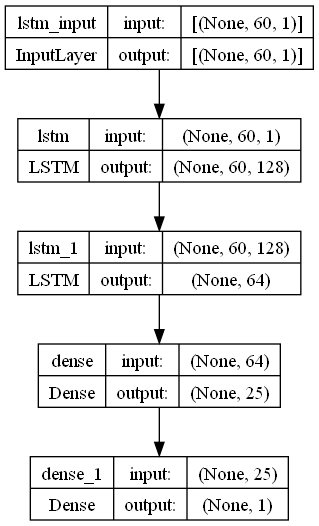

In [14]:
from keras.utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)


The LSTM model uses 60 days of historical closing prices to predict the next day's closing price.
The input variable is the closing price for the past 60 days and the output is the predicted closing price for the 61st day.

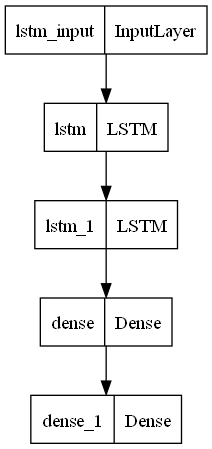

In [15]:
plot_model(model)

In [16]:
hist = model.fit(x_train, y_train, validation_data = (x_val, y_val), 
              batch_size=32, epochs=5) 

Epoch 1/5
30/30 [==============================] - 7s 97ms/step - loss: 0.0228 - mean_squared_error: 0.0228 - val_loss: 0.0015 - val_mean_squared_error: 0.0015
Epoch 2/5
30/30 [==============================] - 2s 73ms/step - loss: 0.0028 - mean_squared_error: 0.0028 - val_loss: 7.7939e-04 - val_mean_squared_error: 7.7939e-04
Epoch 3/5
30/30 [==============================] - 2s 73ms/step - loss: 0.0024 - mean_squared_error: 0.0024 - val_loss: 6.8531e-04 - val_mean_squared_error: 6.8531e-04
Epoch 4/5
30/30 [==============================] - 2s 71ms/step - loss: 0.0021 - mean_squared_error: 0.0021 - val_loss: 6.3616e-04 - val_mean_squared_error: 6.3616e-04
Epoch 5/5
30/30 [==============================] - 2s 67ms/step - loss: 0.0019 - mean_squared_error: 0.0019 - val_loss: 6.3063e-04 - val_mean_squared_error: 6.3063e-04


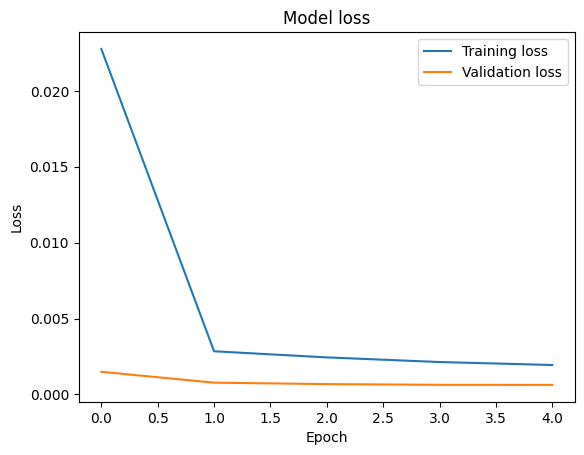

In [17]:
import matplotlib.pyplot as plt

def show_stats (hist):
    plt.plot(hist.history['loss'])
    plt.plot(hist.history['val_loss'])
    plt.title("Model loss")
    plt.ylabel("Loss")
    plt.xlabel("Epoch")
    plt.legend(["Training loss","Validation loss"])
    plt.show()

show_stats (hist)

4/4 [==============================] - 0s 38ms/step
Root mean square error on test data: 0.03942842892118368
Mean absolute error on test data: 0.031139935466565235
Mean squared error on test data: 0.0003788053581231902
Mean absolute percentage error on test data: 8.117198480272279
R^2 score on test data: 0.5501084448258994


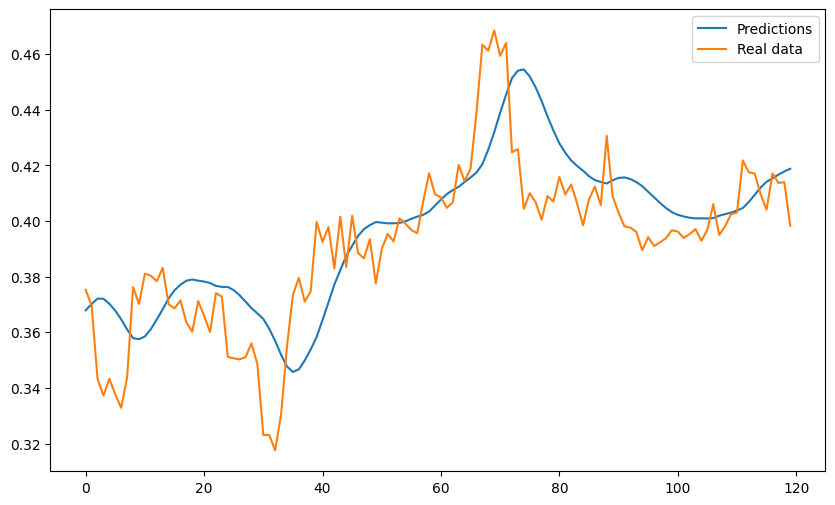

In [22]:
from sklearn.metrics import r2_score, mean_squared_error

# Predict using the LSTM model on the test data
predictions = model.predict(x_test)

# Calculate RMSE
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
print("Root mean square error on test data:", rmse)

# Calculate MAE
mae = np.mean(np.abs(predictions - y_test))
print("Mean absolute error on test data:", mae)

# Calculate MSE
mse = mean_squared_error(y_test, predictions)
print("Mean squared error on test data:", mse)


# Calculate MAPE
mape = np.mean(np.abs((predictions - y_test) / y_test)) * 100
print("Mean absolute percentage error on test data:", mape)

r2 = r2_score(y_test, predictions)
print("R^2 score on test data:", r2)


# Set the figure size and plot the results
plt.figure(figsize=(10, 6))
plt.plot(predictions * factor + shift)
plt.plot(y_test * factor + shift)
plt.legend(["Predictions", "Real data"])
plt.show()

In [28]:
# Function to denormalize data based on shift and factor
def denormalize_data(scaled_data, shift, factor):
    return scaled_data * factor + shift

# Predict using the LSTM model on the test data
predictions = model.predict(x_test)

# Denormalize the predictions and y_test values
denormalized_predictions = denormalize_data(predictions, shift, factor)
denormalized_y_test = denormalize_data(y_test, shift, factor)

# Calculate RMSE on denormalized values
rmse_denormalized = np.sqrt(np.mean(((denormalized_predictions - denormalized_y_test) ** 2)))
print("Root mean square error on test data (original scale):", rmse_denormalized)

# Calculate MSE on denormalized values
mse_denormalized = np.mean((denormalized_predictions - denormalized_y_test) ** 2)
print("Mean squared error on test data (original scale):", mse_denormalized)

# For R^2 score and other metrics, you can use the previously provided code but with denormalized values:
from sklearn.metrics import r2_score
r2_denormalized = r2_score(denormalized_y_test, denormalized_predictions)
print("R^2 score on test data (original scale):", r2_denormalized)

# Calculate MAPE on denormalized values
mape_denormalized = np.mean(np.abs((denormalized_predictions - denormalized_y_test) / denormalized_y_test)) * 100
print("Mean absolute percentage error on test data (original scale):", mape_denormalized)



4/4 [==============================] - 0s 34ms/step
Root mean square error on test data (original scale): 0.03942842892118368
Mean squared error on test data (original scale): 0.0015546010071928334
R^2 score on test data (original scale): 0.5501084448258994
Mean absolute percentage error on test data (original scale): 8.117198480272279


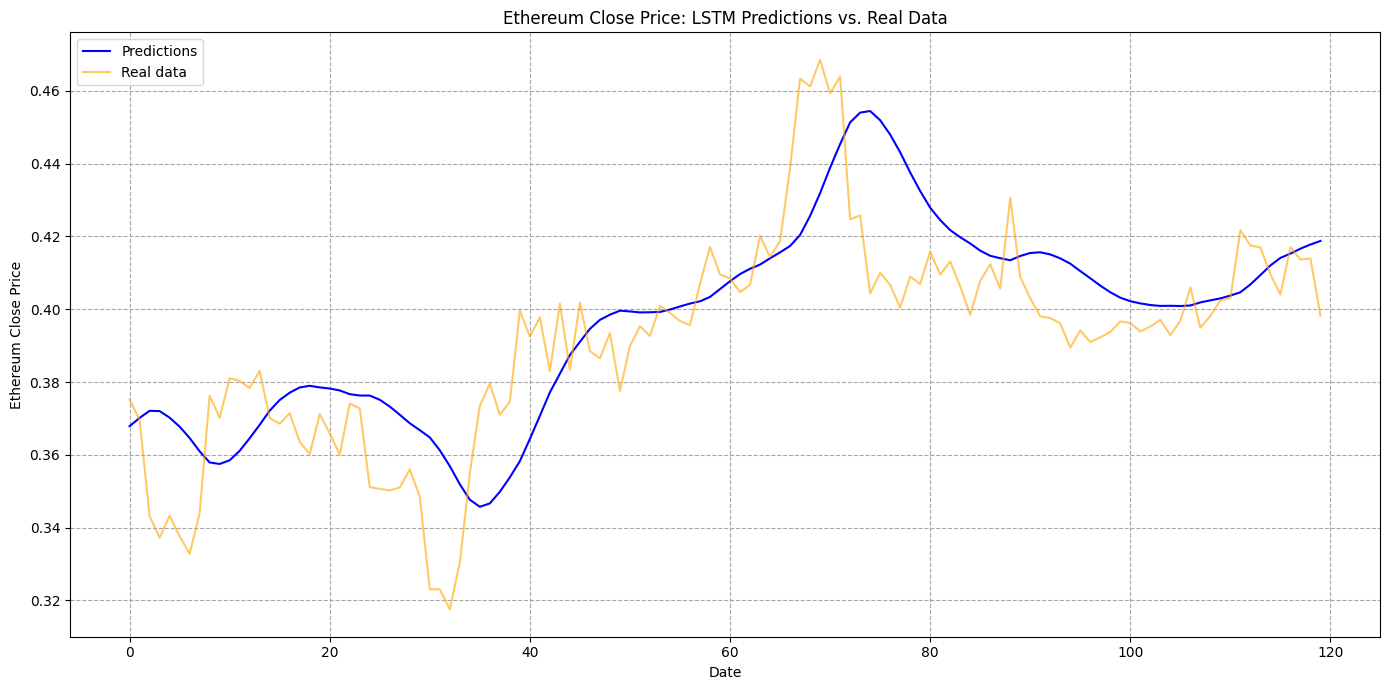

In [31]:
import matplotlib.dates as mdates

# Set the figure size and plot the results
plt.figure(figsize=(14, 7))

# Plotting the data
plt.plot(predictions * factor + shift, label="Predictions", color='blue')
plt.plot(y_test * factor + shift, label="Real data", color='orange', alpha=0.6)

# Adding title and labels
plt.title("Ethereum Close Price: LSTM Predictions vs. Real Data")
plt.xlabel("Date")
plt.ylabel("Ethereum Close Price")
plt.grid(True, which="both", ls="--", c='0.65')

# Formatting Date for better readability if x-axis is in datetime format
# ax = plt.gca()
# ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
# ax.xaxis.set_major_locator(mdates.MonthLocator())
# plt.gcf().autofmt_xdate()

# Displaying the legend
plt.legend(loc="upper left")

# Displaying the plot
plt.tight_layout()
plt.show()


In [38]:
# import ta
# # Add RSI
# data['RSI'] = ta.momentum.RSIIndicator(data['Close']).rsi()


In [39]:
def create_sequences_single_coin(data, dates, history):
    x = []  # List to store input sequences
    y = []  # List to store output sequences
    output_dates = []  # List to store the dates corresponding to the output sequences
    
    for j in range(history, len(data)):  # Iterate over the available data points
        x.append(data[j-history:j])  # Append the input sequence of historical data
        y.append(data[j])  # Append the corresponding output value
        output_dates.append(dates[j])  # Append the corresponding date
    
    return np.array(x)[:, :, np.newaxis], np.array(y), output_dates  # Convert the lists to numpy arrays and return the dates as well


In [40]:
# Create input-output sequences and get the corresponding dates
x_train, y_train, train_dates_list = create_sequences_single_coin(data['Close'].values, data.index, History)
x_val, y_val, val_dates_list = create_sequences_single_coin(data['Close'].values, data.index, History)
x_test, y_test, test_dates_list = create_sequences_single_coin(data['Close'].values, data.index, History)


Epoch 1/5
29/29 - 5s - loss: 0.0450 - 5s/epoch - 188ms/step
Epoch 2/5
29/29 - 2s - loss: 0.0031 - 2s/epoch - 62ms/step
Epoch 3/5
29/29 - 2s - loss: 0.0025 - 2s/epoch - 63ms/step
Epoch 4/5
29/29 - 2s - loss: 0.0024 - 2s/epoch - 65ms/step
Epoch 5/5
29/29 - 2s - loss: 0.0022 - 2s/epoch - 69ms/step
9/9 [==============================] - 1s 21ms/step
0.02806766241247389


C:\Users\fabio\AppData\Local\Temp\ipykernel_49908\2172301884.py:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = closing_price


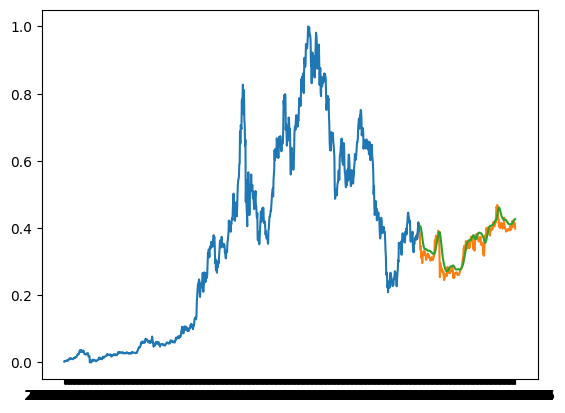

In [41]:
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is your dataframe

# Create a new dataframe with only 'Date' and 'Close' columns
new_data = data[['Date', 'Close']].copy()

# Set the 'Date' as the index
new_data.index = new_data.Date
new_data.drop('Date', axis=1, inplace=True)

# Split data into training and validation sets
dataset = new_data.values
train = dataset[0:987,:]
valid = dataset[987:,:]

# Scale the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)

# Create training data
x_train, y_train = [], []
for i in range(60, len(train)):
    x_train.append(scaled_data[i-60:i, 0])
    y_train.append(scaled_data[i, 0])
x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile and train the model
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, epochs=5, batch_size=32, verbose=2)

# Create test data
inputs = new_data[len(new_data) - len(valid) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = scaler.transform(inputs)

X_test = []
for i in range(60, inputs.shape[0]):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Predict using the model
closing_price = model.predict(X_test)
closing_price = scaler.inverse_transform(closing_price)

# Calculate the RMSE
rms = np.sqrt(np.mean(np.power((valid - closing_price), 2)))
print(rms)

# Plot the results
train = new_data[:987]
valid = new_data[987:]
valid['Predictions'] = closing_price
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.show()


It is divided into test set and training set, and there is no verification set.

Data Preparation:

The data is split into training (train) and validation (valid) sets.
A MinMaxScaler is used to scale the data values between 0 and 1.
For the training data, for each point starting from the 61st data point, the previous 60 data points are used as input features, and the current data point is used as the output label. This results in an input matrix of shape (number of data points, 60, tion:

The LSTM model is constructed with two LSTM layers followed by two dense layers.
The model is compiled using the Adam optimizer and Mean Squared Error loss.
The model is trained using the prepared trainiediction:

The input for the predictions (X_test) is constructed by taking the last 60 data points of the scaled data preceding each point in the validation set.
The model is then used to predict the validation set. Note that the model doesn't retrain after each prediction. Instead, it uses the previously defined rolling window of 60 days to predict the next day for the entirety of the validation set.
The predictions (closing_price) are then inverse transformed to bring them back to the o

This approach uses a rolling window of 60 days to predict each point in the validation set. The model is trained once on the training data and then used to predict the entire validation set without retraining for each new data point.rn  for visual comparison.


In [42]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense

# Assuming df is your dataframe

# Create a new dataframe with only 'Date' and 'Close' columns
new_data = data[['Date', 'Close']].copy()

# Set the 'Date' as the index
new_data.index = new_data.Date
new_data.drop('Date', axis=1, inplace=True)

# Split data into training and validation sets
dataset = new_data.values
train = dataset[0:987,:]

# Scale the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)

# Create training data
x_train, y_train = [], []
for i in range(60, len(train)):
    x_train.append(scaled_data[i-60:i, 0])
    y_train.append(scaled_data[i, 0])
x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile and train the model
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, epochs=5, batch_size=32, verbose=2)


Epoch 1/5
29/29 - 4s - loss: 0.0268 - 4s/epoch - 149ms/step
Epoch 2/5
29/29 - 2s - loss: 0.0029 - 2s/epoch - 53ms/step
Epoch 3/5
29/29 - 2s - loss: 0.0026 - 2s/epoch - 55ms/step
Epoch 4/5
29/29 - 2s - loss: 0.0022 - 2s/epoch - 59ms/step
Epoch 5/5
29/29 - 2s - loss: 0.0024 - 2s/epoch - 58ms/step


9/9 [==============================] - 1s 23ms/step
0.026043172198994994


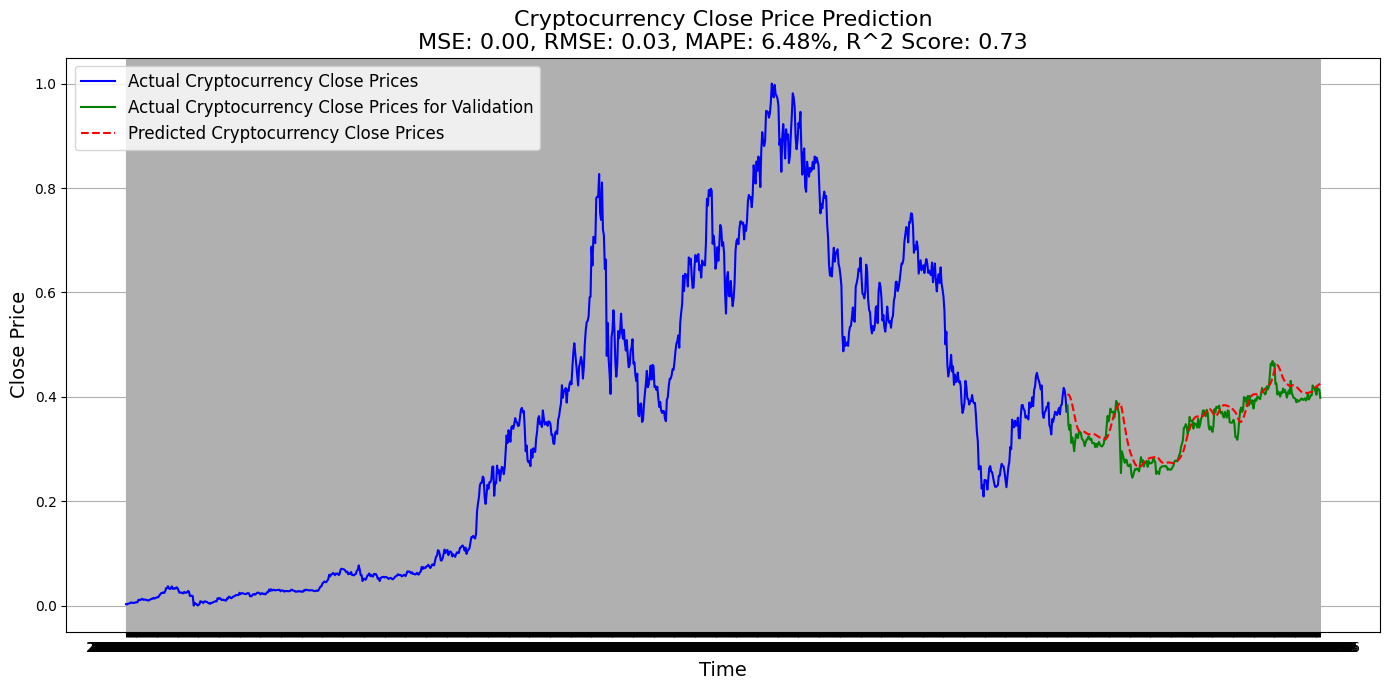

In [43]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Continue from the previous training part
valid = dataset[987:,:]

# Calculate metrics
mse = mean_squared_error(valid, closing_price)
rmse = np.sqrt(mse)
mape = np.mean(np.abs((valid - closing_price) / valid)) * 100
r2 = r2_score(valid, closing_price)

# Create test data
inputs = new_data[len(new_data) - len(valid) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = scaler.transform(inputs)

X_test = []
for i in range(60, inputs.shape[0]):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Predict using the model
closing_price = model.predict(X_test)
closing_price = scaler.inverse_transform(closing_price)

# Calculate the RMSE
rms = np.sqrt(np.mean(np.power((valid - closing_price), 2)))
print(rms)

# Plot the results with enhanced labels and information
plt.figure(figsize=(14, 7))

# Plotting the actual and predicted prices
plt.plot(new_data[:987].index, train, label="Actual Cryptocurrency Close Prices", color='blue', linewidth=1.5)
plt.plot(new_data[987:].index, valid, label="Actual Cryptocurrency Close Prices for Validation", color='green', linewidth=1.5)
plt.plot(new_data[987:].index, closing_price, label="Predicted Cryptocurrency Close Prices", color='red', linestyle='dashed', linewidth=1.5)

# Adding labels, title, and legend
plt.title("Cryptocurrency Close Price Prediction\nMSE: {:.2f}, RMSE: {:.2f}, MAPE: {:.2f}%, R^2 Score: {:.2f}".format(mse, rmse, mape, r2), fontsize=16)
plt.xlabel("Time", fontsize=14)
plt.ylabel("Close Price", fontsize=14)
plt.legend(loc="upper left", fontsize=12)

# Display the plot
plt.grid(True)
plt.tight_layout()
plt.show()

In [44]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

from sklearn.metrics import mean_squared_error, r2_score



# Calculate metrics
mse = mean_squared_error(valid, closing_price)
rmse = np.sqrt(mse)
mape = mean_absolute_percentage_error(valid, closing_price)
r2 = r2_score(valid, closing_price)

print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"MAPE: {mape}%")
print(f"R^2 Score: {r2}")



MSE: 0.0006782468181865058
RMSE: 0.026043172198994994
MAPE: 5.801554722440465%
R^2 Score: 0.7699207781661014


Epoch 1/5
20/20 [==============================] - 5s 91ms/step - loss: 0.0603 - val_loss: 0.0103
Epoch 2/5
20/20 [==============================] - 1s 56ms/step - loss: 0.0242 - val_loss: 0.0050
Epoch 3/5
20/20 [==============================] - 1s 60ms/step - loss: 0.0141 - val_loss: 0.0013
Epoch 4/5
20/20 [==============================] - 1s 51ms/step - loss: 0.0107 - val_loss: 0.0030
Epoch 5/5
1/1 [==============================] - 1s 720ms/step
MSE: 10540.057153099904, RMSE: 102.6647804901949, R2 Score: 0.30534482402391205


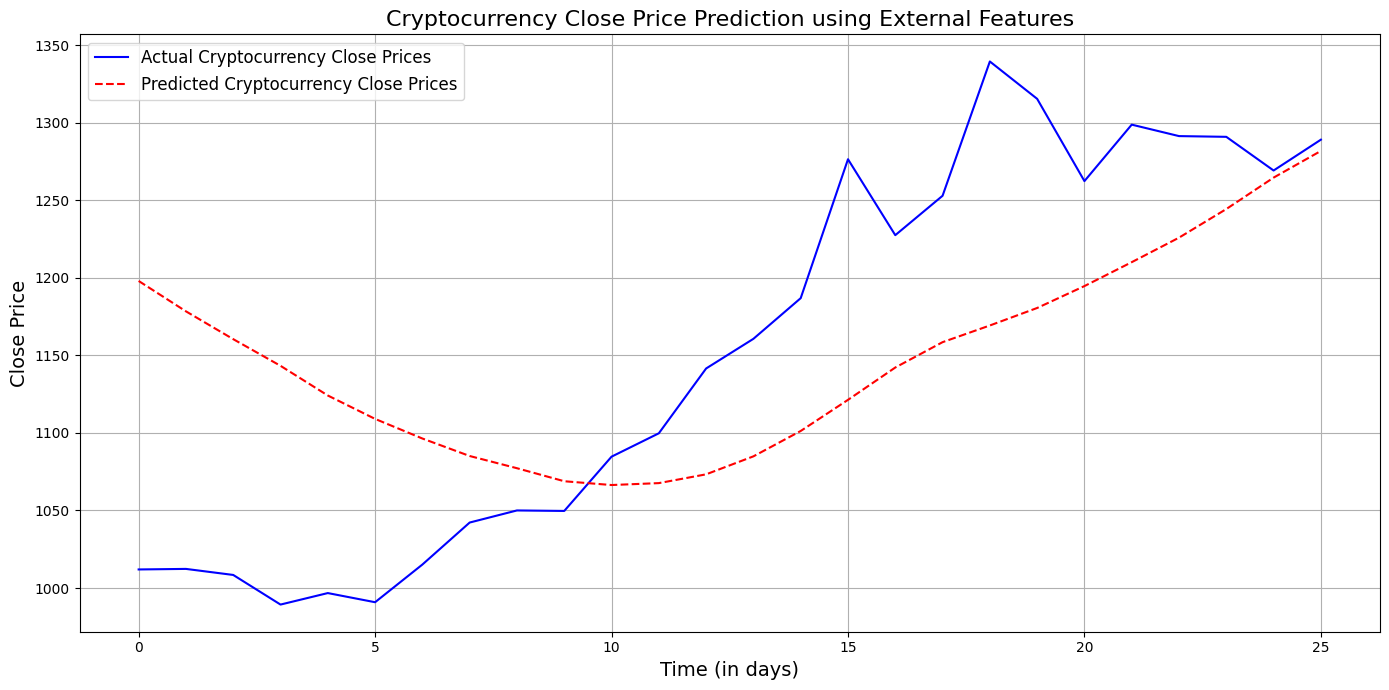

In [45]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score
from keras.models import Sequential
from keras.layers import LSTM, Dense
import matplotlib.pyplot as plt

# 1. Data Preparation
# Load the data
data = pd.read_csv("final_merged_eth_gold_global_data_v1.csv")

# Extract the necessary columns
features_df = data[['Close',  '^IXIC', '^GSPC', '^DJI', '^NYA']].copy()

# Remove rows with NaN values
features_df.dropna(inplace=True)

# Function to split the data
def split_data(data, train_ratio=0.8, val_ratio=0.1):
    train_end = int(train_ratio * len(data))
    val_end = train_end + int(val_ratio * len(data))
    
    train_data = data.iloc[:train_end]
    val_data = data.iloc[train_end:val_end]
    test_data = data.iloc[val_end:]
    
    return train_data, val_data, test_data

# Split the data
train_data, val_data, test_data = split_data(features_df)

# Extract 'Close' column as target and the rest as features
x_train = train_data.drop(columns=['Close']).values
y_train = train_data['Close'].values

x_val = val_data.drop(columns=['Close']).values
y_val = val_data['Close'].values

x_test = test_data.drop(columns=['Close']).values
y_test = test_data['Close'].values

# Scale the data
feature_scaler = MinMaxScaler()
x_train_scaled = feature_scaler.fit_transform(x_train)
x_val_scaled = feature_scaler.transform(x_val)
x_test_scaled = feature_scaler.transform(x_test)

target_scaler = MinMaxScaler()
y_train_scaled = target_scaler.fit_transform(y_train.reshape(-1, 1)).flatten()
y_val_scaled = target_scaler.transform(y_val.reshape(-1, 1)).flatten()
y_test_scaled = target_scaler.transform(y_test.reshape(-1, 1)).flatten()

# Function to create sequences for LSTM
def create_sequences(features, target, look_back=60):
    x, y = [], []
    for i in range(look_back, len(features)):
        x.append(features[i-look_back:i])
        y.append(target[i])
    return np.array(x), np.array(y)

# Create sequences for LSTM
x_train_seq, y_train_seq = create_sequences(x_train_scaled, y_train_scaled)
x_val_seq, y_val_seq = create_sequences(x_val_scaled, y_val_scaled)
x_test_seq, y_test_seq = create_sequences(x_test_scaled, y_test_scaled)

# 2. Building and Training the LSTM Model
def build_multivariate_lstm(input_shape):
    model = Sequential()
    model.add(LSTM(128, return_sequences=True, input_shape=input_shape))
    model.add(LSTM(64, return_sequences=False))
    model.add(Dense(25))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

model = build_multivariate_lstm((x_train_seq.shape[1], x_train_seq.shape[2]))
model.fit(x_train_seq, y_train_seq, validation_data=(x_val_seq, y_val_seq), epochs=5, batch_size=32)

# 3. Model Evaluation
# Predict using the model on validation data
predictions = model.predict(x_val_seq)

# Inverse scale the predictions to get the original values
predictions_original = target_scaler.inverse_transform(predictions)
y_val_original = target_scaler.inverse_transform(y_val_seq.reshape(-1, 1))

# Calculate evaluation metrics
mse = mean_squared_error(y_val_original, predictions_original)
rmse = np.sqrt(mse)
r2 = r2_score(y_val_original, predictions_original)
print(f"MSE: {mse}, RMSE: {rmse}, R2 Score: {r2}")

# Visualizing the results
plt.figure(figsize=(14, 7))
plt.plot(y_val_original, label="Actual Cryptocurrency Close Prices", color='blue', linewidth=1.5)
plt.plot(predictions_original, label="Predicted Cryptocurrency Close Prices", color='red', linestyle='dashed', linewidth=1.5)
plt.title("Cryptocurrency Close Price Prediction using External Features", fontsize=16)
plt.xlabel("Time (in days)", fontsize=14)
plt.ylabel("Close Price", fontsize=14)
plt.legend(loc="upper left", fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()


Epoch 1/5
30/30 [==============================] - 6s 86ms/step - loss: 0.0855 - val_loss: 0.0082
Epoch 2/5
30/30 [==============================] - 2s 54ms/step - loss: 0.0769 - val_loss: 0.0029
Epoch 3/5
30/30 [==============================] - 2s 55ms/step - loss: 0.0762 - val_loss: 0.0048
Epoch 4/5
30/30 [==============================] - 2s 55ms/step - loss: 0.0766 - val_loss: 0.0101
Epoch 5/5
3/3 [==============================] - 1s 19ms/step
MSE: 288877.05246968684, RMSE: 537.4728388204253, R2 Score: -18.578167879670794


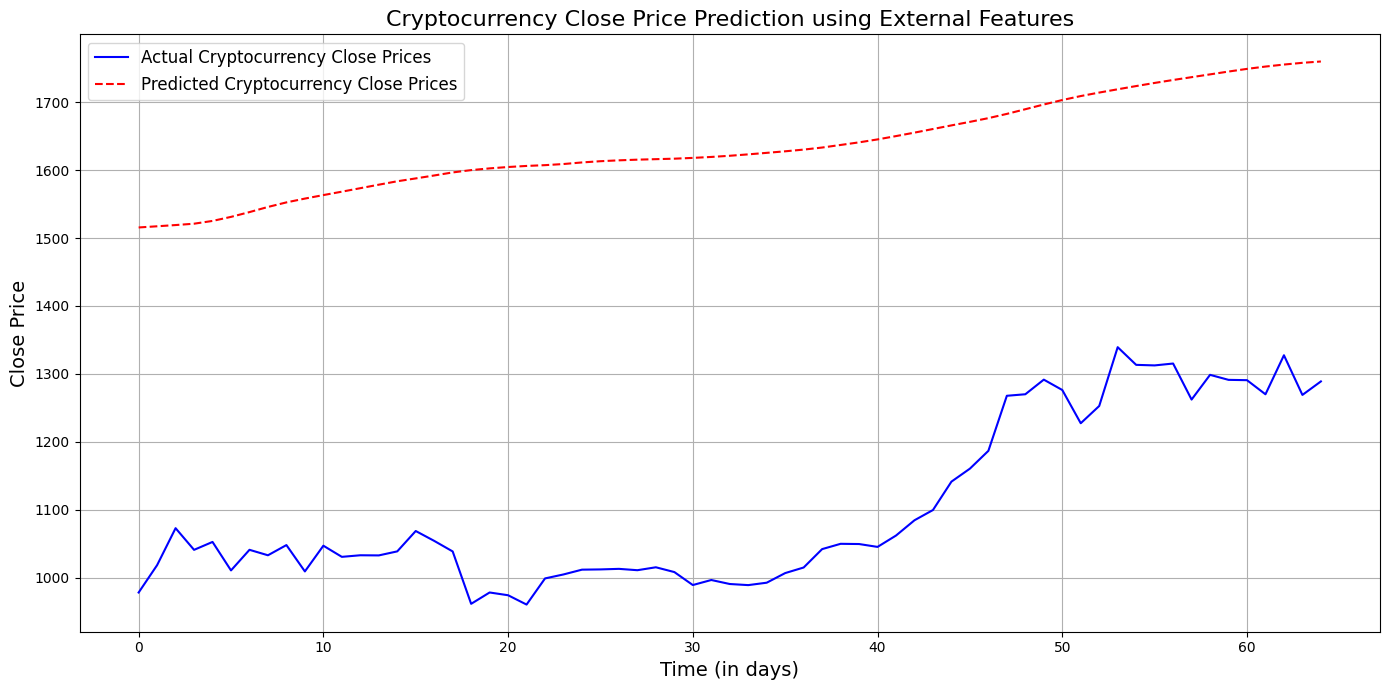

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score
from keras.models import Sequential
from keras.layers import LSTM, Dense
import matplotlib.pyplot as plt

# 1. Data Preparation
# Load the data
data = pd.read_csv("final_merged_eth_gold_global_data_v1.csv")

# Extract the needed columns
features_df = data[['Close', 'Close_gold']].copy()

# Drop rows with NaN values
features_df.dropna(inplace=True)

# Function to split the data
def split_data(data, train_ratio=0.8, val_ratio=0.1):
    train_end = int(train_ratio * len(data))
    val_end = train_end + int(val_ratio * len(data))
    
    train_data = data.iloc[:train_end]
    val_data = data.iloc[train_end:val_end]
    test_data = data.iloc[val_end:]
    
    return train_data, val_data, test_data

# Splitting the data
train_data, val_data, test_data = split_data(features_df)

# Extract 'Close' as target and the rest as features
x_train = train_data.drop(columns=['Close']).values
y_train = train_data['Close'].values

x_val = val_data.drop(columns=['Close']).values
y_val = val_data['Close'].values

x_test = test_data.drop(columns=['Close']).values
y_test = test_data['Close'].values

# Scaling the data
feature_scaler = MinMaxScaler()
x_train_scaled = feature_scaler.fit_transform(x_train)
x_val_scaled = feature_scaler.transform(x_val)
x_test_scaled = feature_scaler.transform(x_test)

target_scaler = MinMaxScaler()
y_train_scaled = target_scaler.fit_transform(y_train.reshape(-1, 1)).flatten()
y_val_scaled = target_scaler.transform(y_val.reshape(-1, 1)).flatten()
y_test_scaled = target_scaler.transform(y_test.reshape(-1, 1)).flatten()

# Function to create data sequences
def create_sequences(features, target, look_back=60):
    x, y = [], []
    for i in range(look_back, len(features)):
        x.append(features[i-look_back:i])
        y.append(target[i])
    return np.array(x), np.array(y)

# Creating data sequences
x_train_seq, y_train_seq = create_sequences(x_train_scaled, y_train_scaled)
x_val_seq, y_val_seq = create_sequences(x_val_scaled, y_val_scaled)
x_test_seq, y_test_seq = create_sequences(x_test_scaled, y_test_scaled)

# 2. Building and Training the LSTM Model
def build_multivariate_lstm(input_shape):
    model = Sequential()
    model.add(LSTM(128, return_sequences=True, input_shape=input_shape))
    model.add(LSTM(64, return_sequences=False))
    model.add(Dense(25))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

model = build_multivariate_lstm((x_train_seq.shape[1], x_train_seq.shape[2]))
model.fit(x_train_seq, y_train_seq, validation_data=(x_val_seq, y_val_seq), epochs=5, batch_size=32)

# 3. Model Evaluation
# Predicting on validation data using the model
predictions = model.predict(x_val_seq)

# Inverse scale the predictions to get original values
predictions_original = target_scaler.inverse_transform(predictions)
y_val_original = target_scaler.inverse_transform(y_val_seq.reshape(-1, 1))

# Calculating evaluation metrics
mse = mean_squared_error(y_val_original, predictions_original)
rmse = np.sqrt(mse)
r2 = r2_score(y_val_original, predictions_original)
print(f"MSE: {mse}, RMSE: {rmse}, R2 Score: {r2}")

# Visualization of prediction results
plt.figure(figsize=(14, 7))
plt.plot(y_val_original, label="Actual Cryptocurrency Close Prices", color='blue', linewidth=1.5)
plt.plot(predictions_original, label="Predicted Cryptocurrency Close Prices", color='red', linestyle='dashed', linewidth=1.5)
plt.title("Cryptocurrency Close Price Prediction using External Features", fontsize=16)
plt.xlabel("Time (in days)", fontsize=14)
plt.ylabel("Close Price", fontsize=14)
plt.legend(loc="upper left", fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()


All features, not good..




Epoch 1/5
20/20 [==============================] - 5s 91ms/step - loss: 0.0603 - val_loss: 0.0308
Epoch 2/5
20/20 [==============================] - 1s 54ms/step - loss: 0.0170 - val_loss: 0.0042
Epoch 3/5
20/20 [==============================] - 1s 62ms/step - loss: 0.0123 - val_loss: 0.0051
Epoch 4/5
20/20 [==============================] - 1s 57ms/step - loss: 0.0116 - val_loss: 0.0033
Epoch 5/5
1/1 [==============================] - 1s 635ms/step
MSE: 38248.99203154857, RMSE: 195.5734952173954, R2 Score: -1.5208459408371406


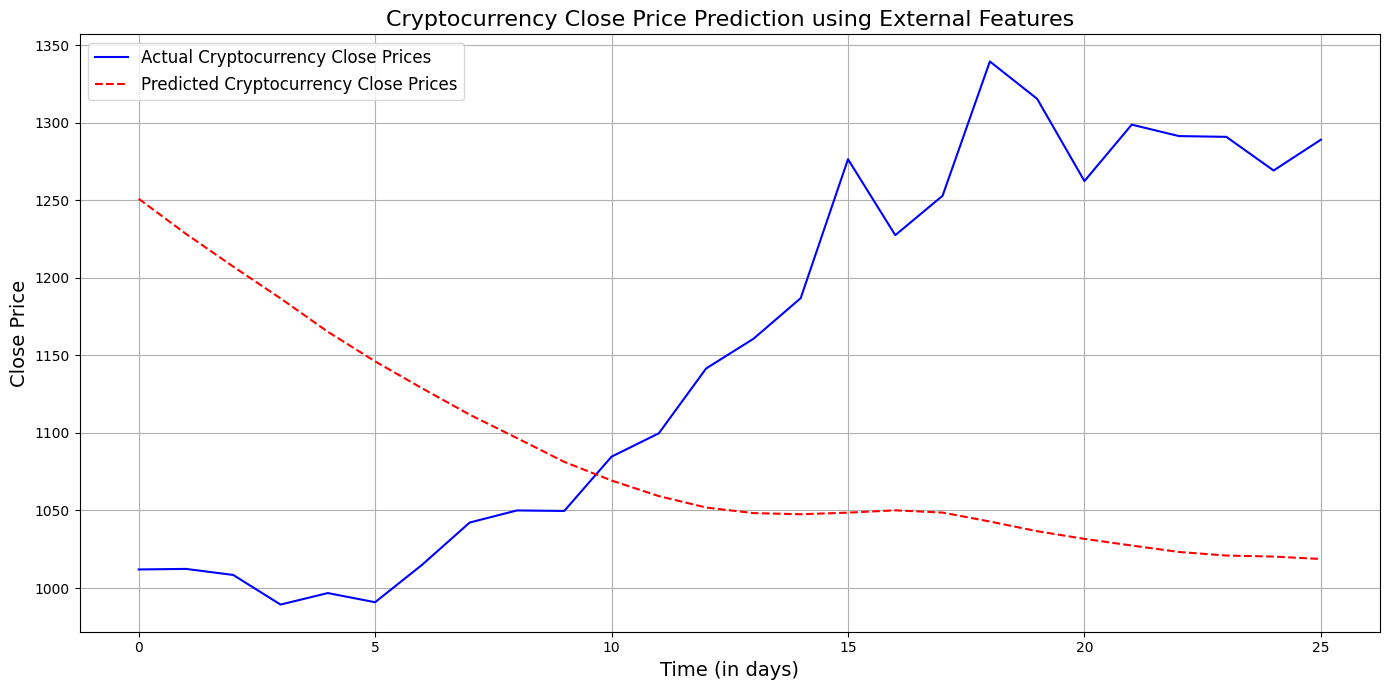

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score
from keras.models import Sequential
from keras.layers import LSTM, Dense

# 1. Data Preparation
# Load data
data = pd.read_csv("final_merged_eth_gold_global_data_v1.csv")

# Extract necessary columns
features_df = data[['Close', 'Close_gold', '^IXIC', '^GSPC', '^DJI', '^NYA']].copy()

# Drop rows containing NaN values
features_df.dropna(inplace=True)

# Function to split the data
def split_data(data, train_ratio=0.8, val_ratio=0.1):
    train_end = int(train_ratio * len(data))
    val_end = train_end + int(val_ratio * len(data))
    
    train_data = data.iloc[:train_end]
    val_data = data.iloc[train_end:val_end]
    test_data = data.iloc[val_end:]
    
    return train_data, val_data, test_data

# Split the data
train_data, val_data, test_data = split_data(features_df)

# Extract 'Close' column as target and the rest as features
x_train = train_data.drop(columns=['Close']).values
y_train = train_data['Close'].values

x_val = val_data.drop(columns=['Close']).values
y_val = val_data['Close'].values

x_test = test_data.drop(columns=['Close']).values
y_test = test_data['Close'].values

# Scale the data
feature_scaler = MinMaxScaler()
x_train_scaled = feature_scaler.fit_transform(x_train)
x_val_scaled = feature_scaler.transform(x_val)
x_test_scaled = feature_scaler.transform(x_test)

target_scaler = MinMaxScaler()
y_train_scaled = target_scaler.fit_transform(y_train.reshape(-1, 1)).flatten()
y_val_scaled = target_scaler.transform(y_val.reshape(-1, 1)).flatten()
y_test_scaled = target_scaler.transform(y_test.reshape(-1, 1)).flatten()

# Function to create data sequences
def create_sequences(features, target, look_back=60):
    x, y = [], []
    for i in range(look_back, len(features)):
        x.append(features[i-look_back:i])
        y.append(target[i])
    return np.array(x), np.array(y)

# Create data sequences
x_train_seq, y_train_seq = create_sequences(x_train_scaled, y_train_scaled)
x_val_seq, y_val_seq = create_sequences(x_val_scaled, y_val_scaled)
x_test_seq, y_test_seq = create_sequences(x_test_scaled, y_test_scaled)

# 2. Build and train the LSTM model
def build_multivariate_lstm(input_shape):
    model = Sequential()
    model.add(LSTM(128, return_sequences=True, input_shape=input_shape))
    model.add(LSTM(64, return_sequences=False))
    model.add(Dense(25))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

model = build_multivariate_lstm((x_train_seq.shape[1], x_train_seq.shape[2]))
model.fit(x_train_seq, y_train_seq, validation_data=(x_val_seq, y_val_seq), epochs=5, batch_size=32)

# 3. Model Evaluation
# Predict on validation data using the model
predictions = model.predict(x_val_seq)

# Inverse scale the predictions to get the original values
predictions_original = target_scaler.inverse_transform(predictions)
y_val_original = target_scaler.inverse_transform(y_val_seq.reshape(-1, 1))

# Calculate evaluation metrics
mse = mean_squared_error(y_val_original, predictions_original)
rmse = np.sqrt(mse)
r2 = r2_score(y_val_original, predictions_original)
print(f"MSE: {mse}, RMSE: {rmse}, R2 Score: {r2}")

# 4. Visualization of prediction results
plt.figure(figsize=(14, 7))
plt.plot(y_val_original, label="Actual Cryptocurrency Close Prices", color='blue', linewidth=1.5)
plt.plot(predictions_original, label="Predicted Cryptocurrency Close Prices", color='red', linestyle='dashed', linewidth=1.5)
plt.title("Cryptocurrency Close Price Prediction using External Features", fontsize=16)
plt.xlabel("Time (in days)", fontsize=14)
plt.ylabel("Close Price", fontsize=14)
plt.legend(loc="upper left", fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()


In [48]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense

# 1. Data Preparation
# Load the data
data = pd.read_csv("final_merged_eth_gold_global_data_v1.csv")

# Extract required columns
features_df = data[['Close',  '^IXIC', '^GSPC', '^DJI', '^NYA']].copy()

# Remove rows with NaN values
features_df.dropna(inplace=True)

# Function to split the data
def split_data(data, train_ratio=0.8, val_ratio=0.1):
    train_end = int(train_ratio * len(data))
    val_end = train_end + int(val_ratio * len(data))
    
    train_data = data.iloc[:train_end]
    val_data = data.iloc[train_end:val_end]
    test_data = data.iloc[val_end:]
    
    return train_data, val_data, test_data

# Split the data
train_data, val_data, _ = split_data(features_df)

# Extract 'Close' column as target and the rest as features
x_train = train_data.drop(columns=['Close']).values
y_train = train_data['Close'].values

x_val = val_data.drop(columns=['Close']).values
y_val = val_data['Close'].values

# Scale the data
feature_scaler = MinMaxScaler()
x_train_scaled = feature_scaler.fit_transform(x_train)
x_val_scaled = feature_scaler.transform(x_val)

target_scaler = MinMaxScaler()
y_train_scaled = target_scaler.fit_transform(y_train.reshape(-1, 1)).flatten()
y_val_scaled = target_scaler.transform(y_val.reshape(-1, 1)).flatten()

# Function to create data sequences
def create_sequences(features, target, look_back=60):
    x, y = [], []
    for i in range(look_back, len(features)):
        x.append(features[i-look_back:i])
        y.append(target[i])
    return np.array(x), np.array(y)

# Create data sequences
x_train_seq, y_train_seq = create_sequences(x_train_scaled, y_train_scaled)
x_val_seq, y_val_seq = create_sequences(x_val_scaled, y_val_scaled)

# 2. Build and train the LSTM model
def build_multivariate_lstm(input_shape):
    model = Sequential()
    model.add(LSTM(128, return_sequences=True, input_shape=input_shape))
    model.add(LSTM(64, return_sequences=False))
    model.add(Dense(25))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

model = build_multivariate_lstm((x_train_seq.shape[1], x_train_seq.shape[2]))
model.fit(x_train_seq, y_train_seq, validation_data=(x_val_seq, y_val_seq), epochs=5, batch_size=32)


Epoch 1/5
20/20 [==============================] - 5s 100ms/step - loss: 0.0722 - val_loss: 0.0247
Epoch 2/5
20/20 [==============================] - 1s 60ms/step - loss: 0.0291 - val_loss: 0.0073
Epoch 3/5
20/20 [==============================] - 1s 62ms/step - loss: 0.0163 - val_loss: 0.0013
Epoch 4/5
20/20 [==============================] - 1s 63ms/step - loss: 0.0121 - val_loss: 0.0016
Epoch 5/5
20/20 [==============================] - 1s 55ms/step - loss: 0.0106 - val_loss: 9.6902e-04


Epoch 1/5
29/29 - 4s - loss: 0.0305 - 4s/epoch - 143ms/step
Epoch 2/5
29/29 - 1s - loss: 0.0032 - 1s/epoch - 47ms/step
Epoch 3/5
29/29 - 1s - loss: 0.0026 - 1s/epoch - 48ms/step
Epoch 4/5
29/29 - 1s - loss: 0.0024 - 1s/epoch - 48ms/step
Epoch 5/5
29/29 - 1s - loss: 0.0022 - 1s/epoch - 47ms/step
9/9 [==============================] - 1s 22ms/step
MSE: 7067.896124016736, RMSE: 84.0707804413444, MAPE: 4.818166608210768%, R^2 Score: 0.7995288783276329


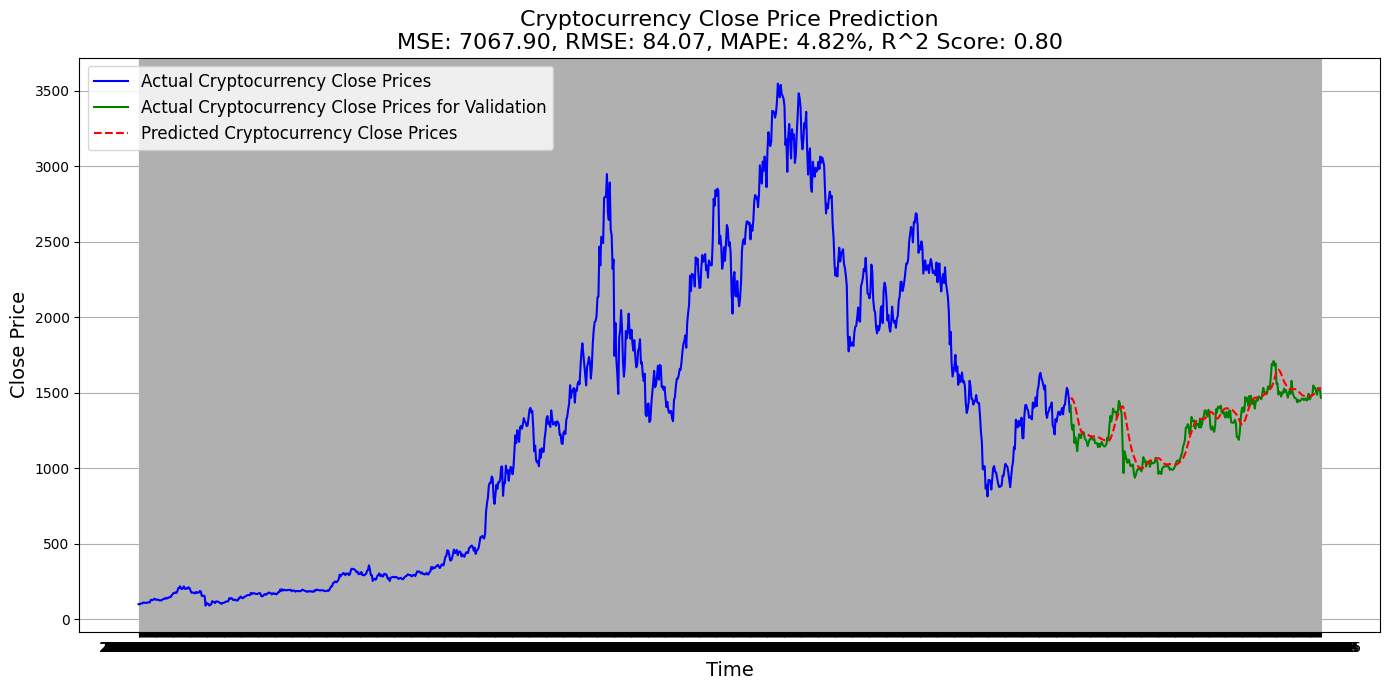

In [49]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Assuming df is your dataframe

# Create a new dataframe with only 'Date' and 'Close' columns
new_data = data[['Date', 'Close']].copy()

# Set the 'Date' as the index
new_data.index = new_data.Date
new_data.drop('Date', axis=1, inplace=True)

# Split data into training and validation sets
dataset = new_data.values
train = dataset[0:987,:]
valid = dataset[987:,:]

# Scale the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)

# Create training data
x_train, y_train = [], []
for i in range(60, len(train)):
    x_train.append(scaled_data[i-60:i, 0])
    y_train.append(scaled_data[i, 0])
x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

# Build the LSTM model using TensorFlow
model = tf.keras.Sequential([
    tf.keras.layers.LSTM(128, return_sequences=True, input_shape=(x_train.shape[1], 1)),
    tf.keras.layers.LSTM(64, return_sequences=False),
    tf.keras.layers.Dense(25),
    tf.keras.layers.Dense(1)
])

# Compile and train the model
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, epochs=5, batch_size=32, verbose=2)

# Continue from the previous training part
valid = dataset[987:,:]

# Create test data
inputs = new_data[len(new_data) - len(valid) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = scaler.transform(inputs)

X_test = []
for i in range(60, inputs.shape[0]):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Predict using the model
closing_price = model.predict(X_test)
closing_price = scaler.inverse_transform(closing_price)

# Calculate the evaluation metrics
mse = mean_squared_error(valid, closing_price)
rmse = np.sqrt(mse)
mape = np.mean(np.abs(valid - closing_price) / valid) * 100
r2 = r2_score(valid, closing_price)
print(f"MSE: {mse}, RMSE: {rmse}, MAPE: {mape}%, R^2 Score: {r2}")

# Plot the results with enhanced labels and information
plt.figure(figsize=(14, 7))

# Plotting the actual and predicted prices
plt.plot(new_data[:987].index, train, label="Actual Cryptocurrency Close Prices", color='blue', linewidth=1.5)
plt.plot(new_data[987:].index, valid, label="Actual Cryptocurrency Close Prices for Validation", color='green', linewidth=1.5)
plt.plot(new_data[987:].index, closing_price, label="Predicted Cryptocurrency Close Prices", color='red', linestyle='dashed', linewidth=1.5)

# Adding labels, title, and legend
plt.title("Cryptocurrency Close Price Prediction\nMSE: {:.2f}, RMSE: {:.2f}, MAPE: {:.2f}%, R^2 Score: {:.2f}".format(mse, rmse, mape, r2), fontsize=16)
plt.xlabel("Time", fontsize=14)
plt.ylabel("Close Price", fontsize=14)
plt.legend(loc="upper left", fontsize=12)

# Display the plot
plt.grid(True)
plt.tight_layout()
plt.show()


1/1 [==============================] - 1s 643ms/step


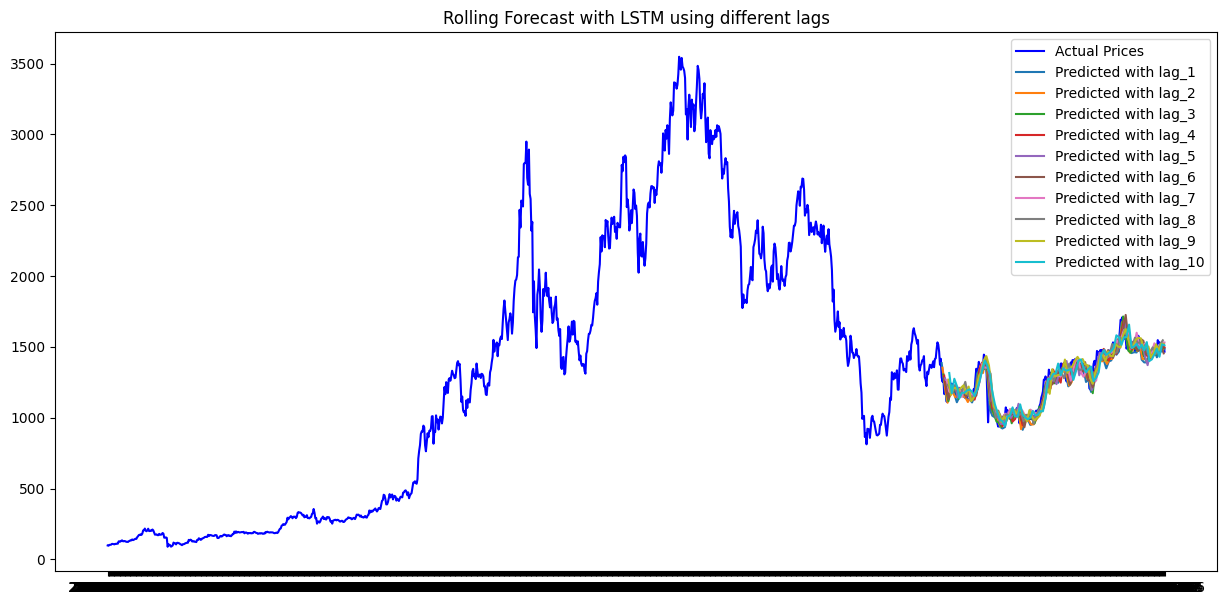

1/1 [==============================] - 1s 930ms/step


1/1 [==============================] - 1s 643ms/step


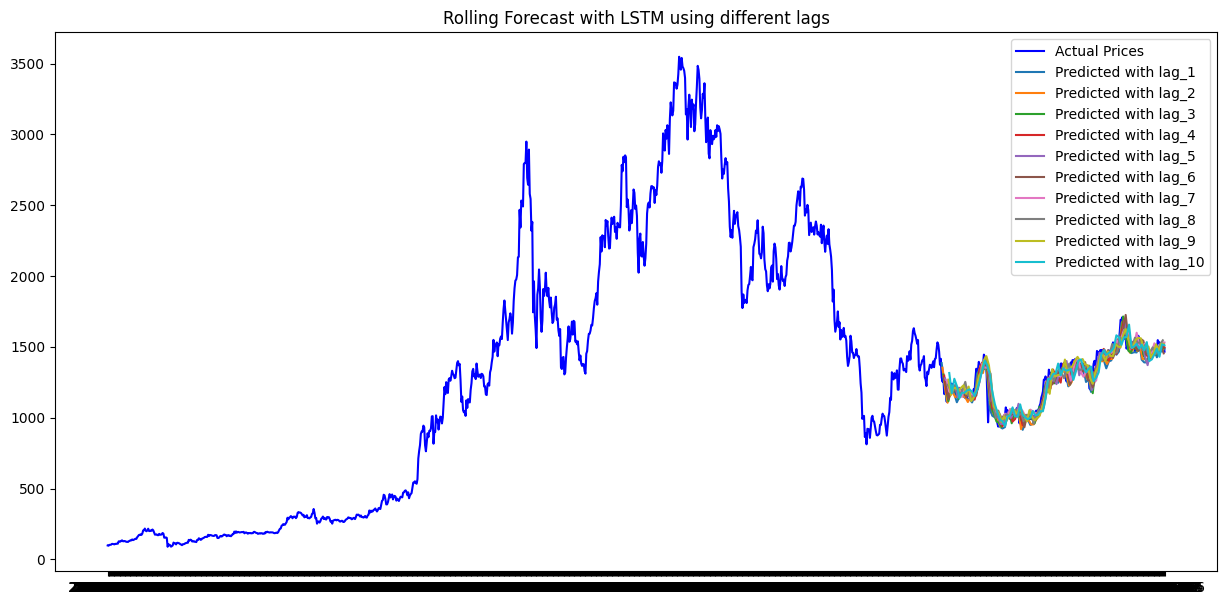

In [19]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

# Create a new dataframe with only 'Date' and 'Close' columns
new_data = data[['Date', 'Close']].copy()

# Set the 'Date' as the index
new_data.index = new_data.Date
new_data.drop('Date', axis=1, inplace=True)

# Split data into training and validation sets
train = new_data.iloc[:987].copy()
valid = new_data.iloc[987:].copy()

# Scale data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(train.values)

# Rolling forecast function
def perform_rolling_forecast(train, test, step_size, num_lags=60):
    predictions = []
    predicted_dates = []
    
    # Initial training data
    initial_train = train.copy()
    
    for start in range(0, len(test) - num_lags, step_size):
        # Append new data to training set
        train = pd.concat([initial_train, test.iloc[start:start+num_lags]])
        
        # Scale the data
        scaled_data = scaler.transform(train.values)
        
        # Generate sequences
        x_train, y_train = [], []
        for i in range(num_lags, len(scaled_data)):
            x_train.append(scaled_data[i-num_lags:i, 0])
            y_train.append(scaled_data[i, 0])
        
        x_train, y_train = np.array(x_train), np.array(y_train)
        x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
        
        # Build and train the LSTM model
        model = tf.keras.Sequential([
            tf.keras.layers.LSTM(128, return_sequences=True, input_shape=(x_train.shape[1], 1)),
            tf.keras.layers.LSTM(64, return_sequences=False),
            tf.keras.layers.Dense(25),
            tf.keras.layers.Dense(1)
        ])
        model.compile(optimizer='adam', loss='mean_squared_error')
        model.fit(x_train, y_train, epochs=5, batch_size=32, verbose=0)
        
        # Create the test data sequence
        x_test = scaler.transform(test.iloc[start:start+num_lags].values)
        x_test = x_test[:, 0].reshape(1, num_lags, 1)
        
        # Predict
        predicted = model.predict(x_test)[0][0]
        predictions.append(predicted)
        predicted_dates.append(test.index[start+num_lags])
    
    return predictions, predicted_dates

# Loop through different lags from 1 to 10
lag_results = {}
for lag in range(1, 11):
    predictions, dates = perform_rolling_forecast(train, valid, 3, num_lags=lag)
    predictions = scaler.inverse_transform(np.array(predictions).reshape(-1, 1))
    lag_results[f"lag_{lag}"] = (dates, predictions)

# Plot the results
plt.figure(figsize=(15, 7))
plt.plot(new_data.index, new_data['Close'], label='Actual Prices', color='blue')

# Plot predictions for each lag
for lag, (dates, predictions) in lag_results.items():
    plt.plot(dates, predictions, label=f'Predicted with {lag}')

plt.legend()
plt.title("Rolling Forecast with LSTM using different lags")
plt.show()


In [22]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
evaluation_metrics = {}

for lag in range(1, 11):
    predictions, dates = perform_rolling_forecast(train, valid, 3, num_lags=lag)
    predictions = scaler.inverse_transform(np.array(predictions).reshape(-1, 1))

    actual_values = valid['Close'].loc[dates].values

    mse = mean_squared_error(actual_values, predictions)
    rmse = np.sqrt(mse)
    r2 = r2_score(actual_values, predictions)
    mae = mean_absolute_error(actual_values, predictions)

    evaluation_metrics[f"lag_{lag}"] = {"MSE": mse, "RMSE": rmse, "R2": r2, "MAE": mae}

for lag, metrics in evaluation_metrics.items():
    print(f"Metrics for {lag}:")
    for metric, value in metrics.items():
        print(f"{metric}: {value:.4f}")
    print("\n")


1/1 [==============================] - 1s 690ms/step
Metrics for lag_1:
MSE: 2657.2365
RMSE: 51.5484
R2: 0.9226
MAE: 42.1347


Metrics for lag_2:
MSE: 4474.7502
RMSE: 66.8936
R2: 0.8733
MAE: 48.2093


Metrics for lag_3:
MSE: 3250.4244
RMSE: 57.0125
R2: 0.9105
MAE: 46.2865


Metrics for lag_4:
MSE: 3608.5460
RMSE: 60.0712
R2: 0.8961
MAE: 42.6161


Metrics for lag_5:
MSE: 5929.3865
RMSE: 77.0025
R2: 0.8339
MAE: 51.3007


Metrics for lag_6:
MSE: 4772.7428
RMSE: 69.0850
R2: 0.8701
MAE: 51.6241


Metrics for lag_7:
MSE: 5648.2361
RMSE: 75.1547
R2: 0.8385
MAE: 53.2109


Metrics for lag_8:
MSE: 6872.6573
RMSE: 82.9015
R2: 0.8094
MAE: 58.6482


Metrics for lag_9:
MSE: 5102.3583
RMSE: 71.4308
R2: 0.8621
MAE: 55.5931


Metrics for lag_10:
MSE: 5264.5418
RMSE: 72.5572
R2: 0.8498
MAE: 52.3891




1/1 [==============================] - 1s 697ms/step


1/1 [==============================] - 1s 690ms/step
Metrics for lag_1:
MSE: 2657.2365
RMSE: 51.5484
R2: 0.9226
MAE: 42.1347


Metrics for lag_2:
MSE: 4474.7502
RMSE: 66.8936
R2: 0.8733
MAE: 48.2093


Metrics for lag_3:
MSE: 3250.4244
RMSE: 57.0125
R2: 0.9105
MAE: 46.2865


Metrics for lag_4:
MSE: 3608.5460
RMSE: 60.0712
R2: 0.8961
MAE: 42.6161


Metrics for lag_5:
MSE: 5929.3865
RMSE: 77.0025
R2: 0.8339
MAE: 51.3007


Metrics for lag_6:
MSE: 4772.7428
RMSE: 69.0850
R2: 0.8701
MAE: 51.6241


Metrics for lag_7:
MSE: 5648.2361
RMSE: 75.1547
R2: 0.8385
MAE: 53.2109


Metrics for lag_8:
MSE: 6872.6573
RMSE: 82.9015
R2: 0.8094
MAE: 58.6482


Metrics for lag_9:
MSE: 5102.3583
RMSE: 71.4308
R2: 0.8621
MAE: 55.5931


Metrics for lag_10:
MSE: 5264.5418
RMSE: 72.5572
R2: 0.8498
MAE: 52.3891




In [39]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

# Assuming df is your dataframe

# Create a new dataframe with only 'Date' and 'Close' columns
new_data = data[['Date', 'Close']].copy()

# Set the 'Date' as the index
new_data.index = new_data.Date
new_data.drop('Date', axis=1, inplace=True)

# Split data into training and validation sets
train = new_data.iloc[:987].copy()
valid = new_data.iloc[987:].copy()

# Scale data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(train.values)

# Rolling forecast function
def perform_rolling_forecast(train, test, step_size, num_lags=60):
    predictions = []
    predicted_dates = []
    
    # Initial training data
    initial_train = train.copy()
    
    for start in range(0, len(test) - num_lags, step_size):
        # Append new data to training set
        train = pd.concat([initial_train, test.iloc[start:start+num_lags]])
        
        # Scale the data
        scaled_data = scaler.transform(train.values)
        
        # Generate sequences
        x_train, y_train = [], []
        for i in range(num_lags, len(scaled_data)):
            x_train.append(scaled_data[i-num_lags:i, 0])
            y_train.append(scaled_data[i, 0])
        
        x_train, y_train = np.array(x_train), np.array(y_train)
        x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
        
        # Build and train the LSTM model
        model = tf.keras.Sequential([
            tf.keras.layers.LSTM(128, return_sequences=True, input_shape=(x_train.shape[1], 1)),
            tf.keras.layers.LSTM(64, return_sequences=False),
            tf.keras.layers.Dense(25),
            tf.keras.layers.Dense(1)
        ])
        model.compile(optimizer='adam', loss='mean_squared_error')
        model.fit(x_train, y_train, epochs=5, batch_size=32, verbose=0)
        
        # Create the test data sequence
        x_test = scaler.transform(test.iloc[start:start+num_lags].values)
        x_test = x_test[:, 0].reshape(1, num_lags, 1)
        
        # Predict
        predicted = model.predict(x_test)[0][0]
        predictions.append(predicted)
        predicted_dates.append(test.index[start+num_lags])
    
    return predictions, predicted_dates

# Perform rolling forecasts for 3 and 7 days
predictions_3days, dates_3days = perform_rolling_forecast(train, valid, 3)
predictions_7days, dates_7days = perform_rolling_forecast(train, valid, 7)

# Convert predictions back to original scale
predictions_3days = scaler.inverse_transform(np.array(predictions_3days).reshape(-1, 1))
predictions_7days = scaler.inverse_transform(np.array(predictions_7days).reshape(-1, 1))

# Plot the results
plt.figure(figsize=(15, 7))
plt.plot(new_data.index, new_data['Close'], label='Actual Prices', color='blue')
plt.plot(dates_3days, predictions_3days, label='Predicted Prices (3 days)', color='red')
plt.plot(dates_7days, predictions_7days, label='Predicted Prices (7 days)', color='green')
plt.legend()
plt.title("Rolling Forecast with LSTM")
plt.show()


1/1 [==============================] - 1s 986ms/step



KeyboardInterrupt



In [8]:
print(data.columns)


Index(['Close', 'Close_gold', 'Volume_gold', 'Unnamed: 0', 'Open', 'High',
       'Low', 'Close_global', 'Adj Close', 'Volume', '000001.SS', 'CL=F',
       'GC=F', '^BSESN', '^DJI', '^FTSE', '^GSPC', '^IXIC', '^N100', '^N225',
       '^NSEI', '^NYA'],
      dtype='object')


Epoch 1/5
29/29 - 6s - loss: 0.0317 - 6s/epoch - 224ms/step
Epoch 2/5
29/29 - 1s - loss: 0.0038 - 1s/epoch - 43ms/step
Epoch 3/5
29/29 - 1s - loss: 0.0029 - 1s/epoch - 45ms/step
Epoch 4/5
29/29 - 1s - loss: 0.0027 - 1s/epoch - 46ms/step
Epoch 5/5
29/29 - 1s - loss: 0.0026 - 1s/epoch - 45ms/step
9/9 [==============================] - 1s 19ms/step
Units LSTM1: 50, Units LSTM2: 50, Dense Units: 25, Learning Rate: 0.001, MSE: 8285.969591539846
Epoch 1/5
29/29 - 6s - loss: 0.0213 - 6s/epoch - 192ms/step
Epoch 2/5
29/29 - 1s - loss: 0.0015 - 1s/epoch - 43ms/step
Epoch 3/5
29/29 - 1s - loss: 0.0015 - 1s/epoch - 42ms/step
Epoch 4/5
29/29 - 1s - loss: 0.0012 - 1s/epoch - 41ms/step
Epoch 5/5
29/29 - 1s - loss: 0.0014 - 1s/epoch - 44ms/step
9/9 [==============================] - 1s 18ms/step
Units LSTM1: 50, Units LSTM2: 50, Dense Units: 25, Learning Rate: 0.01, MSE: 4818.722434536775
Epoch 1/5
29/29 - 6s - loss: 0.0310 - 6s/epoch - 204ms/step
Epoch 2/5
29/29 - 1s - loss: 0.0038 - 1s/epoch - 47ms

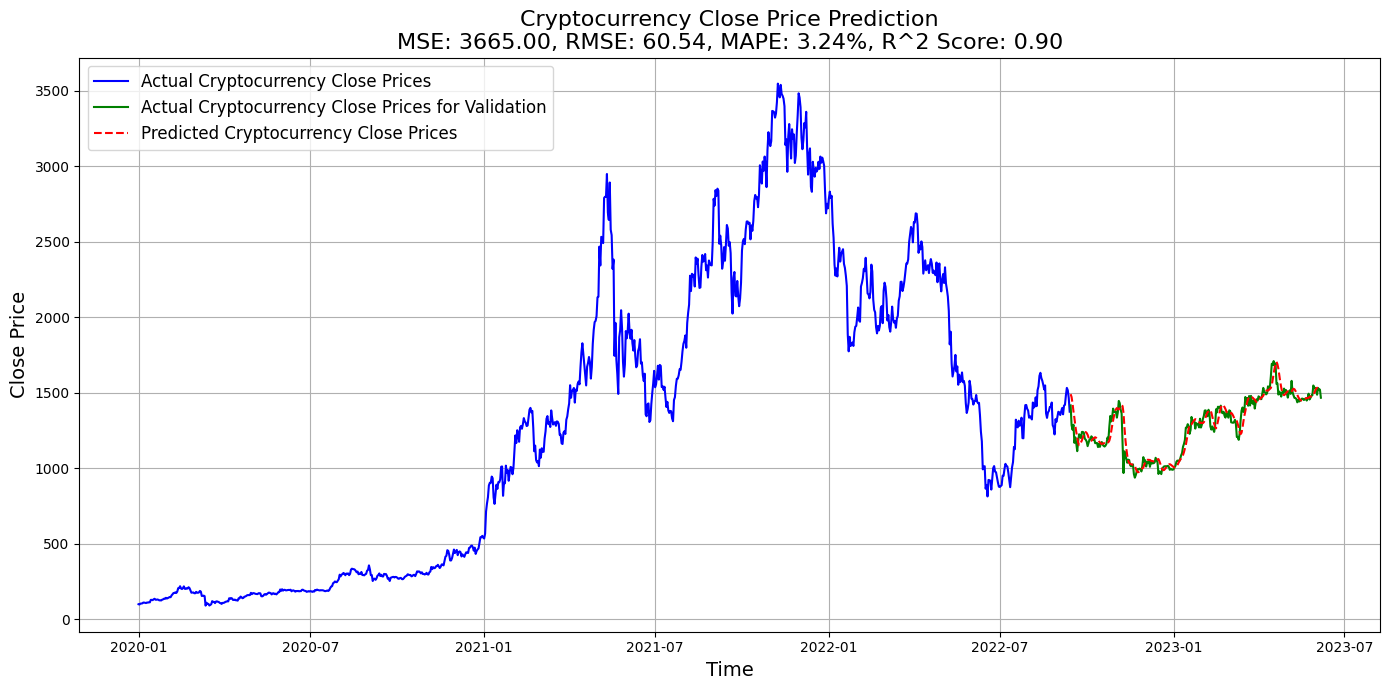

In [44]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Load data
data = pd.read_csv('final_merged_eth_gold_global_data_v1.csv', parse_dates=['Date'])
new_data = data[['Date', 'Close']].copy()
new_data.index = new_data.Date
new_data.drop('Date', axis=1, inplace=True)

# Split data into training and validation sets
dataset = new_data.values
train = dataset[0:987,:]
valid = dataset[987:,:]

# Scale the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)

# Create training data
x_train, y_train = [], []
for i in range(60, len(train)):
    x_train.append(scaled_data[i-60:i, 0])
    y_train.append(scaled_data[i, 0])
x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

# Define a function for building and compiling the model
def create_model(lstm1_units=50, lstm2_units=50, dense_units=25, lr=0.001):
    model = tf.keras.Sequential([
        tf.keras.layers.LSTM(lstm1_units, return_sequences=True, input_shape=(x_train.shape[1], 1)),
        tf.keras.layers.LSTM(lstm2_units, return_sequences=False),
        tf.keras.layers.Dense(dense_units),
        tf.keras.layers.Dense(1)
    ])
    optimizer = tf.keras.optimizers.Adam(learning_rate=lr)
    model.compile(optimizer=optimizer, loss='mean_squared_error')
    return model

# Parameters for grid search
lstm1_units = [50, 100]
lstm2_units = [50, 100]
dense_units = [25, 50]
lr = [0.001, 0.01]

best_model = None
lowest_mse = float('inf')

# Grid search
for lu1 in lstm1_units:
    for lu2 in lstm2_units:
        for du in dense_units:
            for l in lr:
                model = create_model(lu1, lu2, du, l)
                model.fit(x_train, y_train, epochs=5, batch_size=32, verbose=2)
                closing_price = model.predict(X_test)
                closing_price = scaler.inverse_transform(closing_price)
                mse = mean_squared_error(valid, closing_price)
                
                if mse < lowest_mse:
                    best_model = model
                    lowest_mse = mse
                print(f"Units LSTM1: {lu1}, Units LSTM2: {lu2}, Dense Units: {du}, Learning Rate: {l}, MSE: {mse}")

# Continue with the best model for plotting and further evaluations
closing_price = best_model.predict(X_test)
closing_price = scaler.inverse_transform(closing_price)
rmse = np.sqrt(lowest_mse)
mape = np.mean(np.abs(valid - closing_price) / valid) * 100
r2 = r2_score(valid, closing_price)

# Plotting
plt.figure(figsize=(14, 7))
plt.plot(new_data[:987].index, train, label="Actual Cryptocurrency Close Prices", color='blue', linewidth=1.5)
plt.plot(new_data[987:].index, valid, label="Actual Cryptocurrency Close Prices for Validation", color='green', linewidth=1.5)
plt.plot(new_data[987:].index, closing_price, label="Predicted Cryptocurrency Close Prices", color='red', linestyle='dashed', linewidth=1.5)
plt.title("Cryptocurrency Close Price Prediction\nMSE: {:.2f}, RMSE: {:.2f}, MAPE: {:.2f}%, R^2 Score: {:.2f}".format(lowest_mse, rmse, mape, r2), fontsize=16)
plt.xlabel("Time", fontsize=14)
plt.ylabel("Close Price", fontsize=14)
plt.legend(loc="upper left", fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()


In [46]:
# 在模型定义和训练之后
model.summary()


Model: "sequential_34"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_68 (LSTM)              (None, 60, 100)           40800     
                                                                 
 lstm_69 (LSTM)              (None, 100)               80400     
                                                                 
 dense_68 (Dense)            (None, 50)                5050      
                                                                 
 dense_69 (Dense)            (None, 1)                 51        
                                                                 
Total params: 126301 (493.36 KB)
Trainable params: 126301 (493.36 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


1/1 [==============================] - 1s 653ms/step


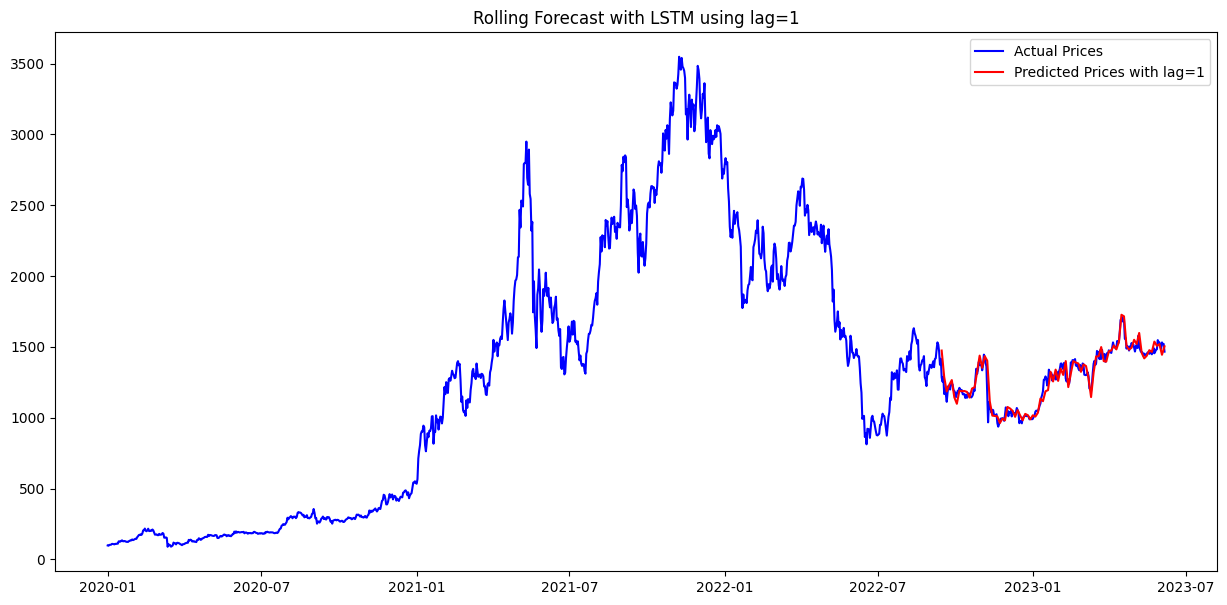

In [47]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

# Assuming data is your dataframe

# Create a new dataframe with only 'Date' and 'Close' columns
new_data = data[['Date', 'Close']].copy()

# Set the 'Date' as the index
new_data.index = new_data.Date
new_data.drop('Date', axis=1, inplace=True)

# Split data into training and validation sets
train = new_data.iloc[:987].copy()
valid = new_data.iloc[987:].copy()

# Scale data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(train.values)

# Rolling forecast function
def perform_rolling_forecast(train, test, step_size, num_lags=1): # Modified the default num_lags to 1
    predictions = []
    predicted_dates = []
    
    # Initial training data
    initial_train = train.copy()
    
    for start in range(0, len(test) - num_lags, step_size):
        # Append new data to training set
        train = pd.concat([initial_train, test.iloc[start:start+num_lags]])
        
        # Scale the data
        scaled_data = scaler.transform(train.values)
        
        # Generate sequences
        x_train, y_train = [], []
        for i in range(num_lags, len(scaled_data)):
            x_train.append(scaled_data[i-num_lags:i, 0])
            y_train.append(scaled_data[i, 0])
        
        x_train, y_train = np.array(x_train), np.array(y_train)
        x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
        
        # Build and train the LSTM model with the specified parameters
        model = tf.keras.Sequential([
            tf.keras.layers.LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], 1)), # 50 units for LSTM1
            tf.keras.layers.LSTM(50, return_sequences=False), # 50 units for LSTM2
            tf.keras.layers.Dense(50), # 50 units for Dense
            tf.keras.layers.Dense(1)
        ])
        optimizer = tf.keras.optimizers.Adam(learning_rate=0.01) # Learning Rate 0.01
        model.compile(optimizer=optimizer, loss='mean_squared_error')
        model.fit(x_train, y_train, epochs=5, batch_size=32, verbose=0)
        
        # Create the test data sequence
        x_test = scaler.transform(test.iloc[start:start+num_lags].values)
        x_test = x_test[:, 0].reshape(1, num_lags, 1)
        
        # Predict
        predicted = model.predict(x_test)[0][0]
        predictions.append(predicted)
        predicted_dates.append(test.index[start+num_lags])
    
    return predictions, predicted_dates

# Perform rolling forecast with lag = 1
predictions, dates = perform_rolling_forecast(train, valid, 3, num_lags=1)
predictions = scaler.inverse_transform(np.array(predictions).reshape(-1, 1))

# Plot the results
plt.figure(figsize=(15, 7))
plt.plot(new_data.index, new_data['Close'], label='Actual Prices', color='blue')
plt.plot(dates, predictions, label='Predicted Prices with lag=1', color='red')

plt.legend()
plt.title("Rolling Forecast with LSTM using lag=1")
plt.show()


1/1 [==============================] - 1s 849ms/step
MSE: 2949.25
RMSE: 54.31
MAE: 40.26
R^2 Score: 0.91


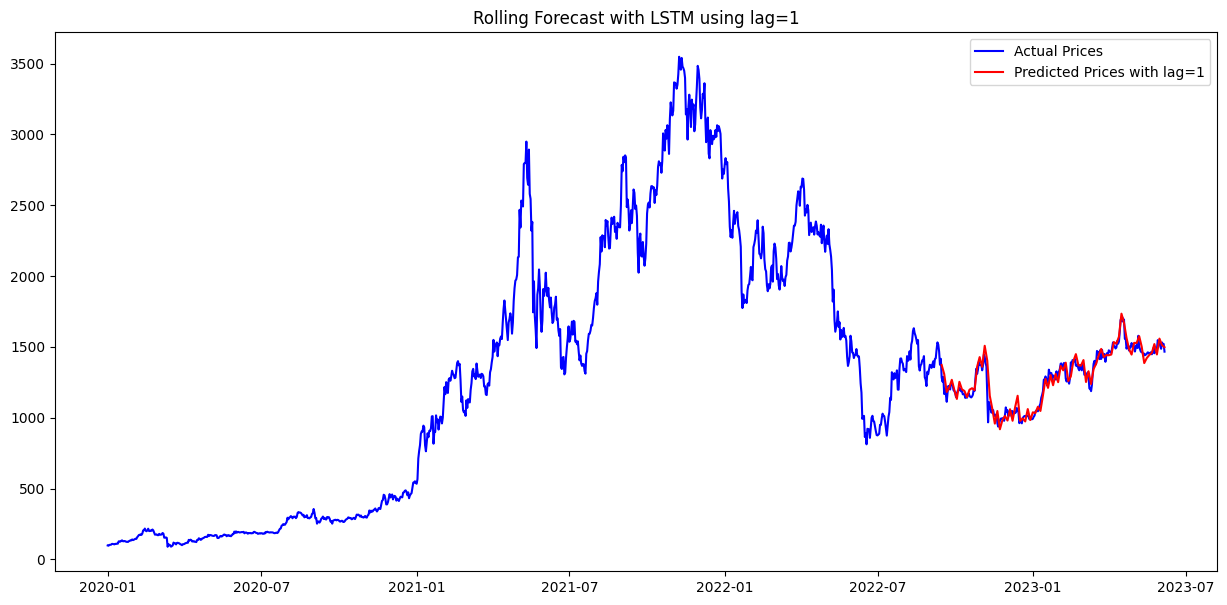

In [49]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score



# Perform rolling forecast with lag = 1
predictions, dates = perform_rolling_forecast(train, valid, 3, num_lags=1)
predictions = scaler.inverse_transform(np.array(predictions).reshape(-1, 1))

# Extracting the actual values from the validation set for the corresponding predicted dates
actual_values = valid.loc[dates].values

# Compute the metrics
mse = mean_squared_error(actual_values, predictions)
rmse = np.sqrt(mse)
mae = mean_absolute_error(actual_values, predictions)
r2 = r2_score(actual_values, predictions)

print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")
print(f"R^2 Score: {r2:.2f}")

# Plot the results
plt.figure(figsize=(15, 7))
plt.plot(new_data.index, new_data['Close'], label='Actual Prices', color='blue')
plt.plot(dates, predictions, label='Predicted Prices with lag=1', color='red')

plt.legend()
plt.title("Rolling Forecast with LSTM using lag=1")
plt.show()


1/1 [==============================] - 1s 819ms/step


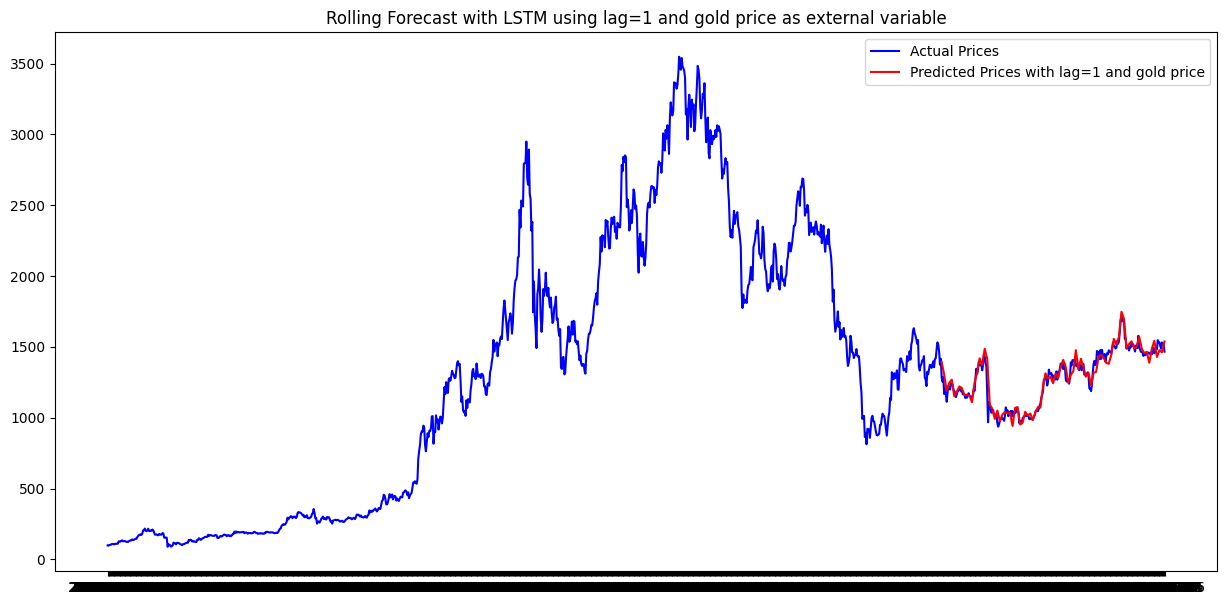

In [50]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt


# Add gold close price as an external variable
new_data = data[['Date', 'Close', 'Close_gold']].copy()

# Set the 'Date' as the index
new_data.index = new_data.Date
new_data.drop('Date', axis=1, inplace=True)

# Split data into training and validation sets
train = new_data.iloc[:987].copy()
valid = new_data.iloc[987:].copy()

# Scale data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(train.values)

# Rolling forecast function with external variable
def perform_rolling_forecast(train, test, step_size, num_lags=1): 
    predictions = []
    predicted_dates = []
    
    # Initial training data
    initial_train = train.copy()
    
    for start in range(0, len(test) - num_lags, step_size):
        # Append new data to training set
        train = pd.concat([initial_train, test.iloc[start:start+num_lags]])
        
        # Scale the data
        scaled_data = scaler.transform(train.values)
        
        # Generate sequences
        x_train, y_train = [], []
        for i in range(num_lags, len(scaled_data)):
            x_train.append(scaled_data[i-num_lags:i])
            y_train.append(scaled_data[i, 0])
        
        x_train, y_train = np.array(x_train), np.array(y_train)
        
        # Build and train the LSTM model with the specified parameters
        model = tf.keras.Sequential([
            tf.keras.layers.LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], x_train.shape[2])),
            tf.keras.layers.LSTM(50, return_sequences=False),
            tf.keras.layers.Dense(50),
            tf.keras.layers.Dense(1)
        ])
        optimizer = tf.keras.optimizers.Adam(learning_rate=0.01)
        model.compile(optimizer=optimizer, loss='mean_squared_error')
        model.fit(x_train, y_train, epochs=5, batch_size=32, verbose=0)
        
        # Create the test data sequence
        x_test = scaler.transform(test.iloc[start:start+num_lags].values)
        x_test = x_test.reshape(1, num_lags, -1)
        
        # Predict
        predicted = model.predict(x_test)[0][0]
        predictions.append(predicted)
        predicted_dates.append(test.index[start+num_lags])
    
    return predictions, predicted_dates



# Perform rolling forecast with lag = 1 and gold price as external variable
predictions, dates = perform_rolling_forecast(train, valid, 3, num_lags=1)

# Convert predictions to a numpy array
predictions = np.array(predictions)

# Create a dummy array to inverse transform our predictions
dummy_array = np.zeros((len(predictions), 2))
dummy_array[:,0] = predictions.ravel()
predictions = scaler.inverse_transform(dummy_array)[:,0]

# Plot the results
plt.figure(figsize=(15, 7))
plt.plot(new_data.index, new_data['Close'], label='Actual Prices', color='blue')
plt.plot(dates, predictions, label='Predicted Prices with lag=1 and gold price', color='red')
plt.legend()
plt.title("Rolling Forecast with LSTM using lag=1 and gold price as external variable")
plt.show()



'''
Below, I just print the metircs. The method used is the same as the previous cell.
'''

1/1 [==============================] - 1s 541ms/step
MAPE: 3.48%
MSE: 3181.26
RMSE: 56.40
R^2: 0.91


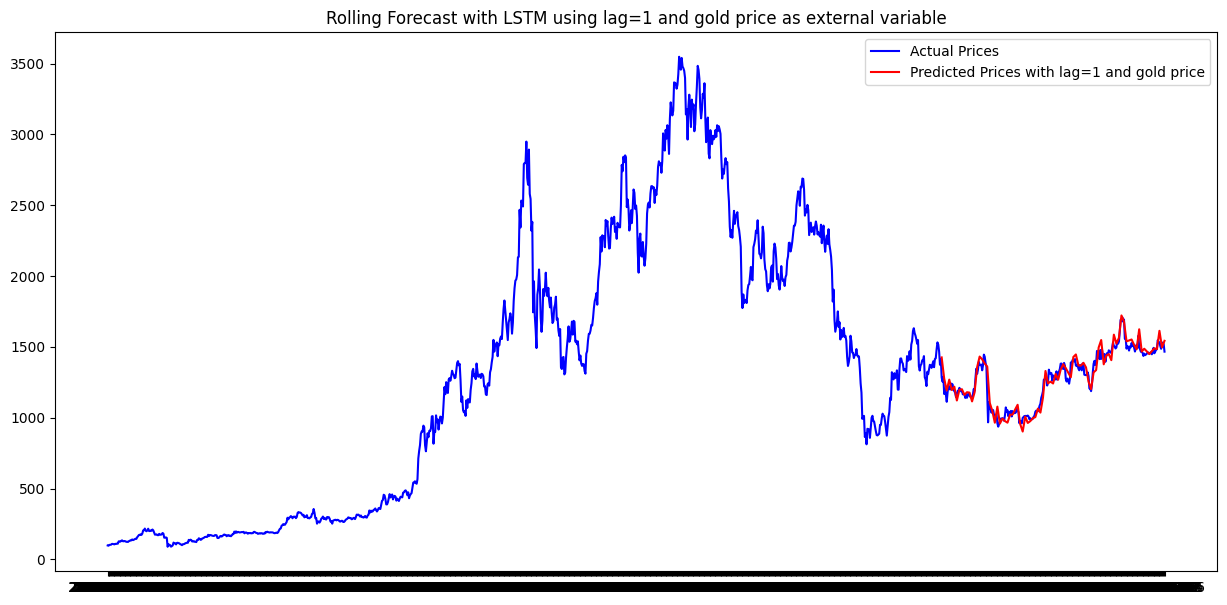

In [51]:
from sklearn.metrics import mean_squared_error, r2_score

# Function to calculate Mean Absolute Percentage Error (MAPE)
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Perform rolling forecast with lag = 1 and gold price as external variable
predictions, dates = perform_rolling_forecast(train, valid, 3, num_lags=1)

# Convert predictions to a numpy array
predictions = np.array(predictions)

# Create a dummy array to inverse transform our predictions
dummy_array = np.zeros((len(predictions), 2))
dummy_array[:,0] = predictions.ravel()
predictions = scaler.inverse_transform(dummy_array)[:,0]

# Calculate metrics on the validation data
actuals = valid['Close'].loc[dates]

mape = mean_absolute_percentage_error(actuals, predictions)
mse = mean_squared_error(actuals, predictions)
rmse = np.sqrt(mse)
r2 = r2_score(actuals, predictions)

print(f"MAPE: {mape:.2f}%")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R^2: {r2:.2f}")

# Plot the results
plt.figure(figsize=(15, 7))
plt.plot(new_data.index, new_data['Close'], label='Actual Prices', color='blue')
plt.plot(dates, predictions, label='Predicted Prices with lag=1 and gold price', color='red')
plt.legend()
plt.title("Rolling Forecast with LSTM using lag=1 and gold price as external variable")
plt.show()


1/1 [==============================] - 1s 874ms/step


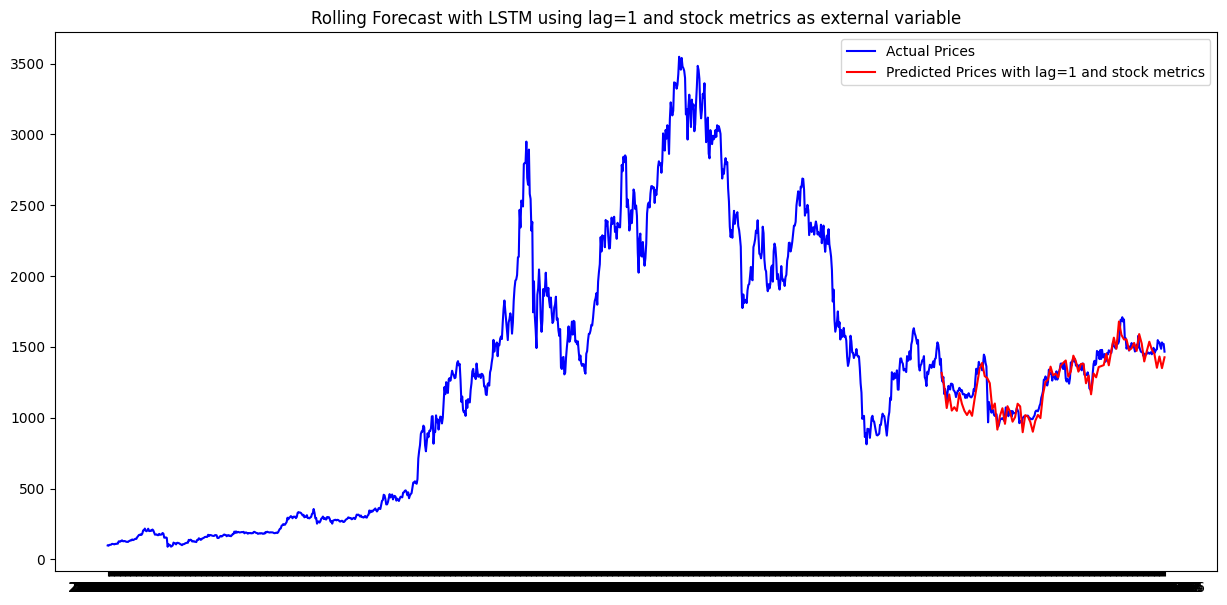

Using Stock Metrics as External Variables:
MSE: 84047.82819102307
RMSE: 289.91003465044645
MAPE: 21.825212590907338%
MAE: 233.2902982388556
R2: -4.367884392797773


In [58]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

# Load the data
data = pd.read_csv('final_merged_eth_gold_global_data_v1.csv')

# Handle NaN values
data.fillna(method='ffill', inplace=True)  # Forward fill
data.fillna(method='bfill', inplace=True)  # Backward fill for any remaining NaNs

# Add stock metrics as external variables
new_data = data[['Date', 'Close', '^IXIC', '^GSPC', '^DJI', '^NYA']].copy()

# Set the 'Date' as the index
new_data.index = new_data.Date
new_data.drop('Date', axis=1, inplace=True)

# Split data into training and validation sets
train = new_data.iloc[:987].copy()
valid = new_data.iloc[987:].copy()

# Scale data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(train.values)

# Rolling forecast function with external variables
def perform_rolling_forecast(train, test, step_size, num_lags=1): 
    predictions = []
    predicted_dates = []
    
    # Initial training data
    initial_train = train.copy()
    
    for start in range(0, len(test) - num_lags, step_size):
        # Append new data to training set
        train = pd.concat([initial_train, test.iloc[start:start+num_lags]])
        
        # Scale the data
        scaled_data = scaler.transform(train.values)
        
        # Generate sequences
        x_train, y_train = [], []
        for i in range(num_lags, len(scaled_data)):
            x_train.append(scaled_data[i-num_lags:i])
            y_train.append(scaled_data[i, 0])
        
        x_train, y_train = np.array(x_train), np.array(y_train)
        
        # Build and train the LSTM model with the specified parameters
        model = tf.keras.Sequential([
            tf.keras.layers.LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], x_train.shape[2])),
            tf.keras.layers.LSTM(50, return_sequences=False),
            tf.keras.layers.Dense(50),
            tf.keras.layers.Dense(1)
        ])
        optimizer = tf.keras.optimizers.Adam(learning_rate=0.01)
        model.compile(optimizer=optimizer, loss='mean_squared_error')
        model.fit(x_train, y_train, epochs=5, batch_size=32, verbose=0)
        
        # Create the test data sequence
        x_test = scaler.transform(test.iloc[start:start+num_lags].values)
        x_test = x_test.reshape(1, num_lags, -1)
        
        # Predict
        predicted = model.predict(x_test)[0][0]
        predictions.append(predicted)
        predicted_dates.append(test.index[start+num_lags])
    
    return predictions, predicted_dates

predictions, dates = perform_rolling_forecast(train, valid, 3, num_lags=1)
predictions = np.array(predictions).reshape(-1, 1)

# Create a dummy array to inverse transform our predictions
dummy_array = np.zeros((len(predictions), new_data.shape[1]))
dummy_array[:,0] = predictions.ravel()
predictions = scaler.inverse_transform(dummy_array)[:,0]

# Plot the results
plt.figure(figsize=(15, 7))
plt.plot(new_data.index, new_data['Close'], label='Actual Prices', color='blue')
plt.plot(dates, predictions, label='Predicted Prices with lag=1 and stock metrics', color='red')
plt.legend()
plt.title("Rolling Forecast with LSTM using lag=1 and stock metrics as external variable")
plt.show()

# Calculate the four metrics for this model
mse_stock = mean_squared_error(valid['Close'].iloc[1:len(predictions)+1], predictions)
rmse_stock = np.sqrt(mse_stock)
mape_stock = np.mean(np.abs(valid['Close'].iloc[1:len(predictions)+1] - predictions) / valid['Close'].iloc[1:len(predictions)+1]) * 100
mae_stock = np.mean(np.abs(valid['Close'].iloc[1:len(predictions)+1] - predictions))
# Calculate the R2 score for the model using stock metrics as external variables
r2_stock = r2_score(valid['Close'].iloc[1:len(predictions)+1], predictions)

print("Using Stock Metrics as External Variables:")
print(f"MSE: {mse_stock}")
print(f"RMSE: {rmse_stock}")
print(f"MAPE: {mape_stock}%")
print(f"MAE: {mae_stock}")
print(f"R2: {r2_stock}")  